In [155]:
import pandas as pd

In [156]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader
from pvlib.iotools import read_tmy3
from matplotlib import rcParams


rcParams['figure.figsize'] = 20, 6
rcParams['lines.linewidth'] = 2.5

# Data

In [157]:
GHI_cs = pd.read_csv('data/Ineichen_clear_sky_model.csv', index_col='Unnamed: 0')[:'2023-06-01 01']

In [158]:
'/Users/yaizabermudez/internship/data_stage/Ineichen_clear_sky_model.csv'

'/Users/yaizabermudez/internship/data_stage/Ineichen_clear_sky_model.csv'

In [159]:
GHI_cs = GHI_cs.drop('dhi', axis = 1)
GHI_cs = GHI_cs.drop('dni', axis = 1)

In [160]:
GHI_m = pd.read_csv('data/Rayonnement solaire-data-2023-06-13 09_46_08.csv', index_col='Time')[:'2023-06-01 01']

In [161]:
GHI_m.columns = ['ghi_m']

In [162]:
GHI_cs.index = pd.to_datetime(GHI_cs.index, format ='%Y-%m-%d %H:%M:%S') 
GHI_cs =GHI_cs.tz_convert('Europe/Paris').tz_localize(None)


In [163]:
GHI_m.index = pd.to_datetime(GHI_m.index, format ='%Y-%m-%d %H:%M:%S')
GHI_m = GHI_m.tz_localize('UTC').tz_localize(None)

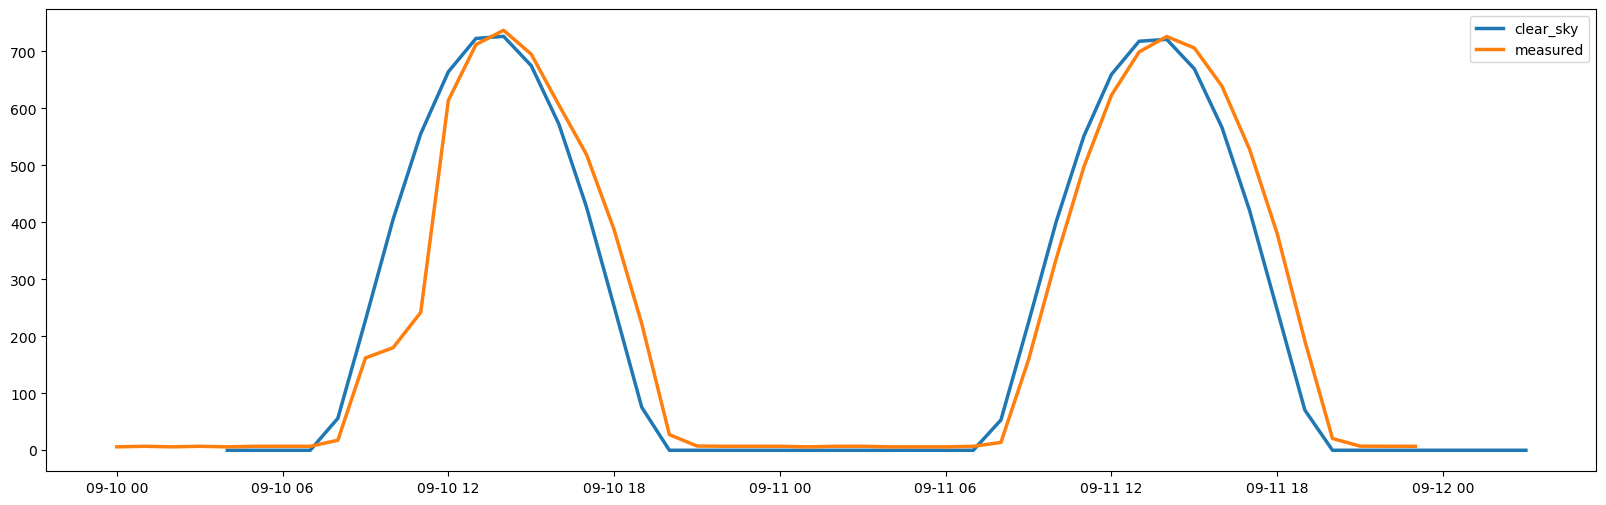

In [164]:
plt.plot(GHI_cs[:48], label='clear_sky')
plt.plot(GHI_m[:48], label='measured')
plt.legend()
plt.show()

In [165]:

GHI_m = GHI_m['2022-09-10 04:00:00':'2023-06-01 00']

In [166]:
GHI_cs = GHI_cs['2022-09-10 04:00:00':'2023-06-01 00']

In [167]:
neb =pd.read_csv("data/neb.csv", index_col='Date')
neb

nebulosity
Date                            
2022-09-10 00:00:00     0.552006
2022-09-10 01:00:00     0.538226
2022-09-10 02:00:00     0.593627
2022-09-10 03:00:00     0.590393
2022-09-10 04:00:00     0.900041
...                          ...
2023-05-31 20:00:00     0.607466
2023-05-31 21:00:00     0.436023
2023-05-31 22:00:00     0.325349
2023-05-31 23:00:00     0.873555
2023-06-01 00:00:00     0.571237

[6337 rows x 1 columns]

In [168]:
GHI_cs/= 1000
GHI_m/=1000

In [169]:
neb.index = pd.to_datetime(neb.index, format ='%Y-%m-%d %H:%M:%S')
neb= neb ['2022-09-10 04:00:00':'2023-06-01 00']

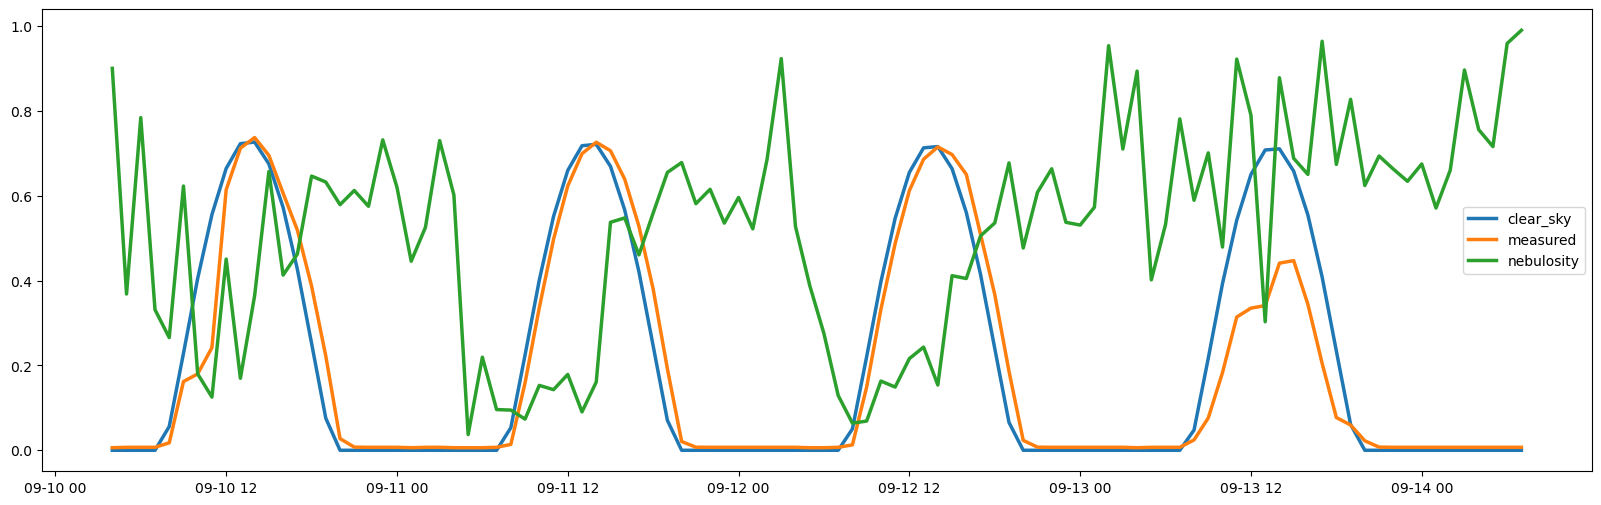

In [170]:
plt.plot(GHI_cs[:100], label='clear_sky')
plt.plot(GHI_m[:100], label='measured')
plt.plot(neb[:100], label = 'nebulosity')
plt.legend()
plt.show()

In [171]:
neb.index = GHI_cs.index
GHI_m.index = GHI_cs.index

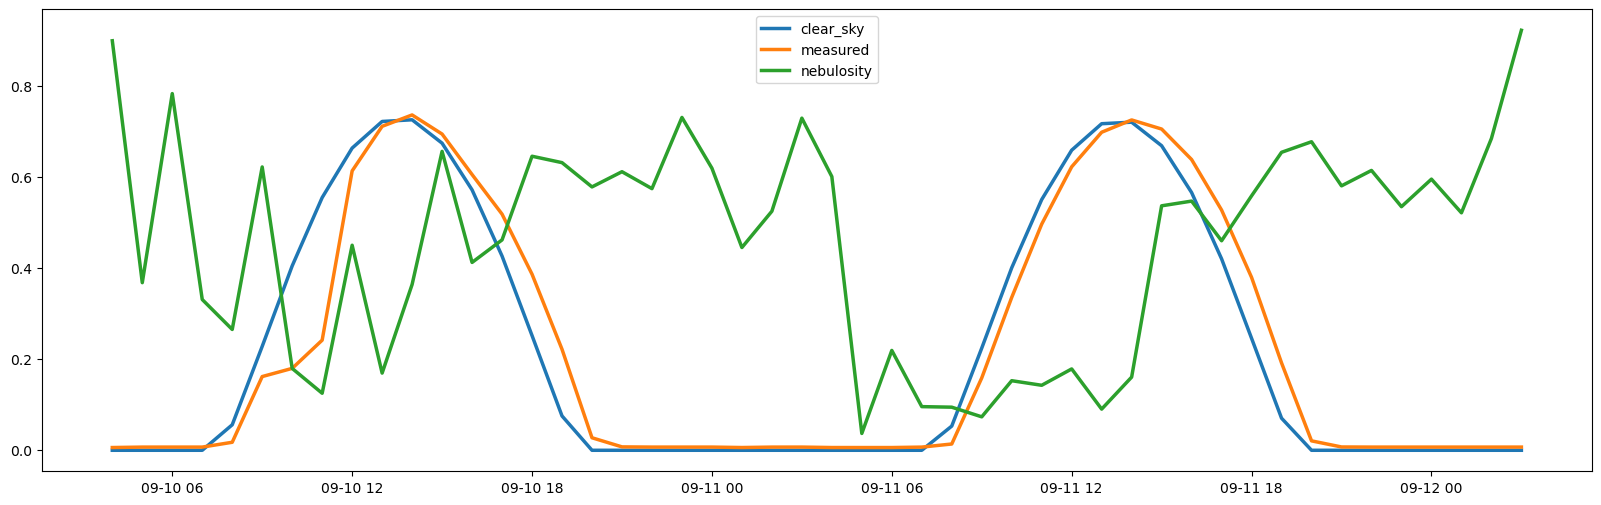

In [172]:
plt.plot(GHI_cs[:48], label='clear_sky')
plt.plot(GHI_m[:48], label='measured')
plt.plot(neb[:48], label = 'nebulosity')
plt.legend()
plt.show()

In [173]:
df = neb.copy()
df['ghi_m'] = GHI_m['ghi_m']
df['ghi_cs'] = GHI_cs['ghi']

In [174]:
df[:48]

nebulosity    ghi_m    ghi_cs
2022-09-10 04:00:00     0.900041  0.00603  0.000000
2022-09-10 05:00:00     0.368325  0.00697  0.000000
2022-09-10 06:00:00     0.783914  0.00700  0.000000
2022-09-10 07:00:00     0.331366  0.00700  0.000000
2022-09-10 08:00:00     0.265519  0.01760  0.056038
2022-09-10 09:00:00     0.622709  0.16200  0.228406
2022-09-10 10:00:00     0.179906  0.18000  0.405246
2022-09-10 11:00:00     0.125308  0.24200  0.555382
2022-09-10 12:00:00     0.450649  0.61400  0.664162
2022-09-10 13:00:00     0.169631  0.71200  0.722665
2022-09-10 14:00:00     0.364421  0.73700  0.726355
2022-09-10 15:00:00     0.656976  0.69500  0.674934
2022-09-10 16:00:00     0.412853  0.60600  0.572339
2022-09-10 17:00:00     0.462355  0.51900  0.426856
2022-09-10 18:00:00     0.646254  0.38700  0.252157
2022-09-10 19:00:00     0.632176  0.22200  0.075451
2022-09-10 20:00:00     0.578818  0.02750  0.000000
2022-09-10 21:00:00     0.612252  0.00747  0.000000
2022-09-10 22:00:00     0.575026  0.00700  0.000000
2022-09-10 23:00:00     0.731531  0.00700  0.000000
2022-09-11 00:00:00     0.619947  0.00700  0.000000
2022-09-11 01:00:00     0.445606  0.00603  0.000000
2022-09-11 02:00:00     0.525383  0.00697  0.000000
2022-09-11 03:00:00     0.729921  0.00700  0.000000
2022-09-11 04:00:00     0.601526  0.00603  0.000000
2022-09-11 05:00:00     0.036987  0.00600  0.000000
2022-09-11 06:00:00     0.219399  0.00600  0.000000
2022-09-11 07:00:00     0.095928  0.00697  0.000000
2022-09-11 08:00:00     0.094716  0.01380  0.053188
2022-09-11 09:00:00     0.073504  0.15900  0.224539
2022-09-11 10:00:00     0.152899  0.33600  0.401095
2022-09-11 11:00:00     0.142847  0.49700  0.551006
2022-09-11 12:00:00     0.178795  0.62300  0.659529
2022-09-11 13:00:00     0.090460  0.69900  0.717731
2022-09-11 14:00:00     0.160830  0.72600  0.721093
2022-09-11 15:00:00     0.537278  0.70600  0.669339
2022-09-11 16:00:00     0.547648  0.63900  0.566444
2022-09-11 17:00:00     0.460502  0.52800  0.420750
2022-09-11 18:00:00     0.559170  0.38000  0.246088
2022-09-11 19:00:00     0.654875  0.19200  0.070512
2022-09-11 20:00:00     0.678091  0.02070  0.000000
2022-09-11 21:00:00     0.581151  0.00727  0.000000
2022-09-11 22:00:00     0.615046  0.00700  0.000000
2022-09-11 23:00:00     0.535393  0.00700  0.000000
2022-09-12 00:00:00     0.595884  0.00700  0.000000
2022-09-12 01:00:00     0.521887  0.00700  0.000000
2022-09-12 02:00:00     0.685208  0.00700  0.000000
2022-09-12 03:00:00     0.923077  0.00700  0.000000

In [175]:
df.loc[df['ghi_m'] <= 0.01 ] = 0.0

In [176]:
df

nebulosity   ghi_m    ghi_cs
2022-09-10 04:00:00     0.000000  0.0000  0.000000
2022-09-10 05:00:00     0.000000  0.0000  0.000000
2022-09-10 06:00:00     0.000000  0.0000  0.000000
2022-09-10 07:00:00     0.000000  0.0000  0.000000
2022-09-10 08:00:00     0.265519  0.0176  0.056038
...                          ...     ...       ...
2023-05-31 20:00:00     0.607466  0.0507  0.095277
2023-05-31 21:00:00     0.436023  0.0146  0.000876
2023-05-31 22:00:00     0.000000  0.0000  0.000000
2023-05-31 23:00:00     0.000000  0.0000  0.000000
2023-06-01 00:00:00     0.000000  0.0000  0.000000

[6333 rows x 3 columns]

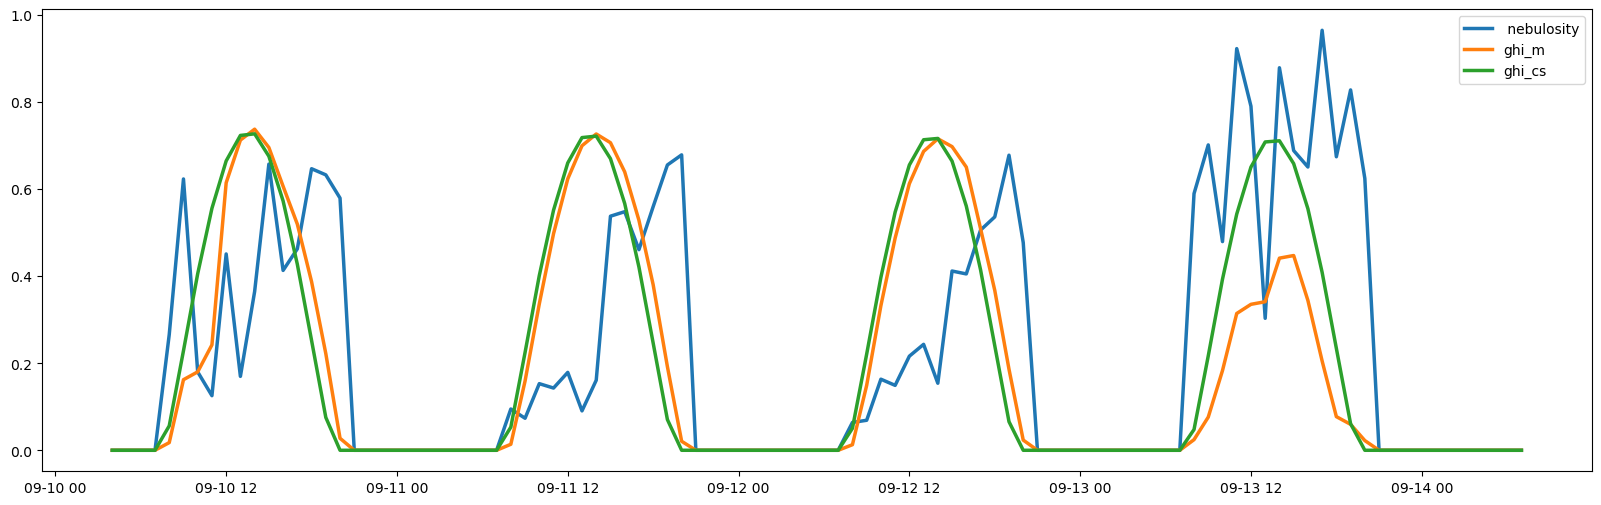

In [177]:
plt.plot(df[:100], label = df.columns)
plt.legend()

# Neural Network approach

## Train to find a and n 

In [23]:
df_ = df.to_numpy()
df_ = torch.tensor(df_, dtype=torch.float32)
my_dataset = TensorDataset(df_) # create your datset
my_dataloader = DataLoader(my_dataset, batch_size=24)

In [21]:
train = df[:]

In [22]:
X_train = torch.tensor(train.values, dtype=torch.float32)

In [23]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(3, 24)
        self.hidden2 = nn.Linear(24, 24)
        self.output1 = nn.Linear(24, 1)
        self.output2 = nn.Linear(24, 1)
 
 
    def forward(self, x):
        x = (self.hidden1(x))
        x =(self.hidden2(x))
        output1 = (self.output1(x))
        output2 = (self.output2(x))
        return output1, output2

In [24]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (hidden1): Linear(in_features=3, out_features=24, bias=True)
  (hidden2): Linear(in_features=24, out_features=24, bias=True)
  (output1): Linear(in_features=24, out_features=1, bias=True)
  (output2): Linear(in_features=24, out_features=1, bias=True)
)


In [25]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [26]:
n_epochs = 100
batch_size = 24
 
for epoch in range(n_epochs):
    for index in my_dataloader:
        # print(index)
        y_pred = model(index[0])
        a, n1 = y_pred
        # calculating squared difference between target and predicted values 
        diff = torch.square(index[0][:,1] - (1- (a * torch.pow(index[0][:,0], n1)))* index[0][:,2])
        loss = torch.sum(diff)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 8.470443725585938
Finished epoch 1, latest loss 6.457520961761475
Finished epoch 2, latest loss 5.918859004974365
Finished epoch 3, latest loss 5.780631065368652
Finished epoch 4, latest loss 5.875069618225098
Finished epoch 5, latest loss 6.014190196990967
Finished epoch 6, latest loss 6.142176628112793
Finished epoch 7, latest loss 6.254891395568848
Finished epoch 8, latest loss 6.349020957946777
Finished epoch 9, latest loss 6.428208351135254
Finished epoch 10, latest loss 6.4944963455200195
Finished epoch 11, latest loss 6.550264835357666
Finished epoch 12, latest loss 6.598918914794922
Finished epoch 13, latest loss 6.644214630126953
Finished epoch 14, latest loss 6.690381050109863
Finished epoch 15, latest loss 6.744044303894043
Finished epoch 16, latest loss 6.804558753967285
Finished epoch 17, latest loss 6.829546928405762
Finished epoch 18, latest loss 6.867939472198486
Finished epoch 19, latest loss 6.910336494445801
Finished epoch 20, latest los

Test on trained data

In [27]:
a_, n_ = model(X_train)

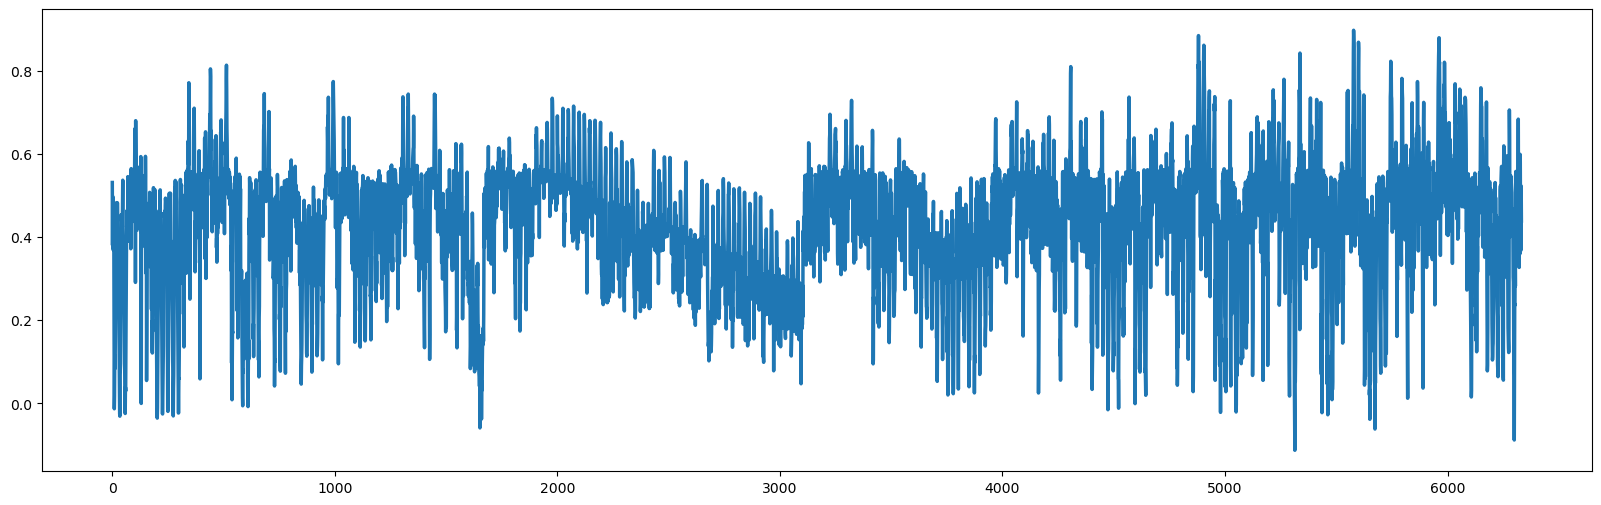

In [28]:
plt.plot(a_.detach().numpy().flatten(), label = 'a')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


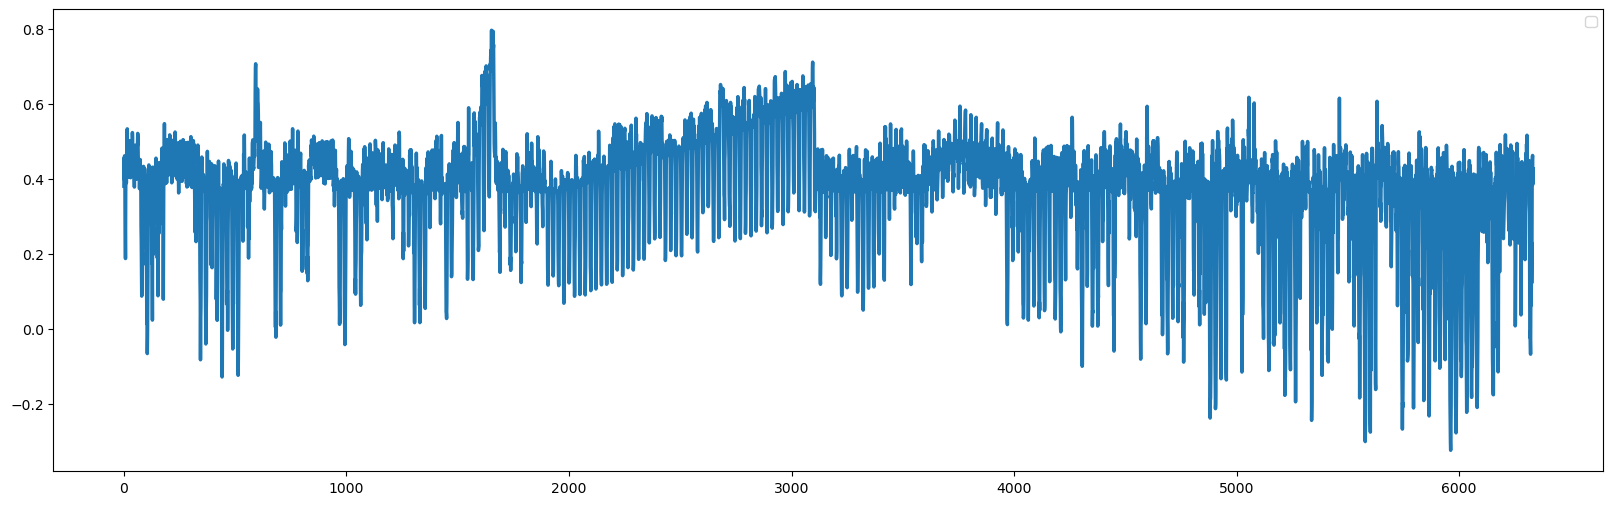

In [29]:

plt.plot(n_.detach().numpy().flatten())
plt.legend()
plt.show()

In [30]:
len(a_)

6333

In [31]:
ghi_cs = df['ghi_cs']

In [32]:
neb = df[' nebulosity']

In [33]:
pred = GHI_cs.copy()
pred.columns = ['pred_']

In [34]:
pred

pred_
2022-09-10 04:00:00  0.000000
2022-09-10 05:00:00  0.000000
2022-09-10 06:00:00  0.000000
2022-09-10 07:00:00  0.000000
2022-09-10 08:00:00  0.056038
...                       ...
2023-05-31 20:00:00  0.095277
2023-05-31 21:00:00  0.000876
2023-05-31 22:00:00  0.000000
2023-05-31 23:00:00  0.000000
2023-06-01 00:00:00  0.000000

[6333 rows x 1 columns]

In [35]:
pred['pred_'] = ((1-a_.detach().numpy().flatten()*np.power(neb.to_numpy(), n_.detach().numpy().flatten()))* ghi_cs.to_numpy())*1000

In [36]:
true = GHI_m*1000

In [37]:
from sklearn.metrics import mean_squared_error as MSE
testScore = np.sqrt(MSE(true.values, pred.values))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/true.values.max())

Test Score: 82.95 RMSE
RMSE en % :  9.19645040789925


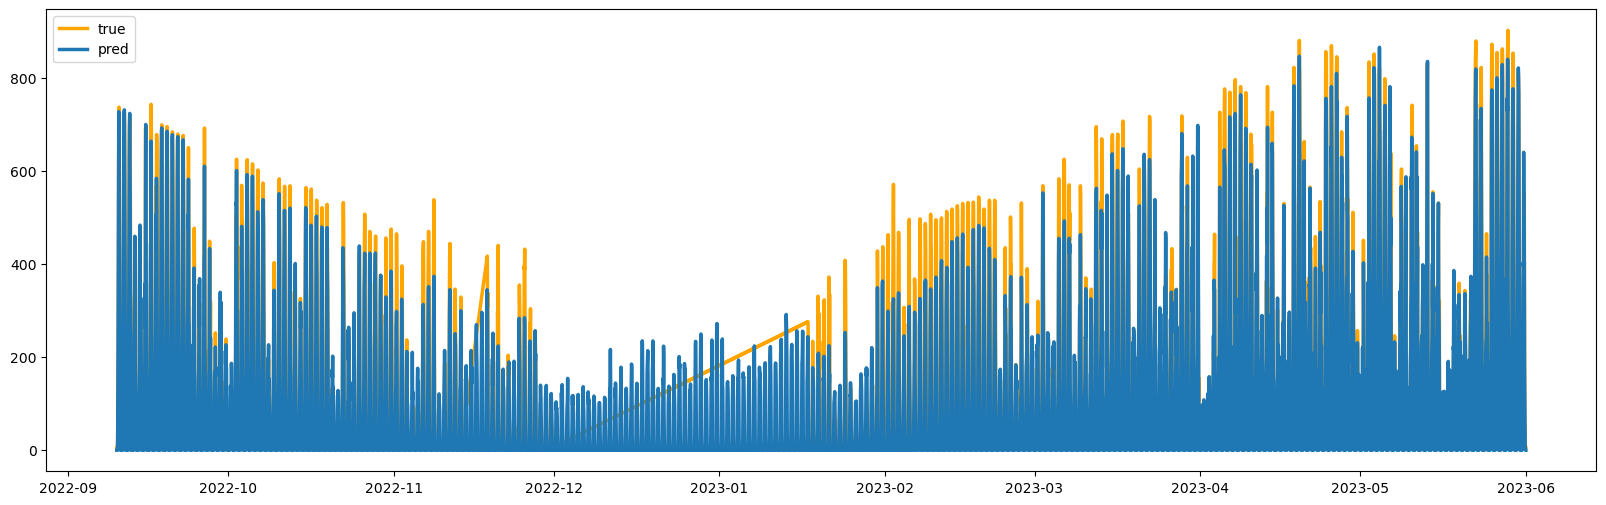

In [38]:
plt.plot(true, label = 'true', color = 'orange')
plt.plot(pred, label = 'pred')
plt.legend()
plt.show()


In [39]:
# torch.save(model.state_dict(), 'models/model_ss_fact_bis.pth')

## Train to find nebulosity
Try to predict the nebulosity with the above predicted a and n 

In [434]:
a_val = a_.detach().numpy().flatten()
n_val = n_.detach().numpy().flatten()

In [435]:
df_neb = df.drop(' nebulosity', axis=1)
df_neb['a'] = a_val
df_neb['n'] = n_val

In [436]:
df_neb

ghi_m    ghi_cs         a         n
2022-09-10 04:00:00  0.0000  0.000000  0.531116  0.381527
2022-09-10 05:00:00  0.0000  0.000000  0.380432  0.457160
2022-09-10 06:00:00  0.0000  0.000000  0.497417  0.398694
2022-09-10 07:00:00  0.0000  0.000000  0.369995  0.462387
2022-09-10 08:00:00  0.0176  0.056038  0.370808  0.429957
...                     ...       ...       ...       ...
2023-05-31 20:00:00  0.0507  0.095277  0.454109  0.374433
2023-05-31 21:00:00  0.0146  0.000876  0.392083  0.453318
2023-05-31 22:00:00  0.0000  0.000000  0.368177  0.463336
2023-05-31 23:00:00  0.0000  0.000000  0.522657  0.386078
2023-06-01 00:00:00  0.0000  0.000000  0.438547  0.427795

[6333 rows x 4 columns]

In [437]:
df_neb_ = df_neb.to_numpy()
df_neb_ = torch.tensor(df_neb_, dtype=torch.float32)
my_dataset_neb = TensorDataset(df_neb_) # create your datset
my_dataloader_neb = DataLoader(my_dataset_neb, batch_size=24)

In [438]:
train = df_neb[:]

In [439]:
X_train = torch.tensor(train.values, dtype=torch.float32)

In [440]:
class NeuralNetwork2(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(4, 24)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(24, 24)
        self.act2 = nn.ReLU()
        self.output1 = nn.Linear(24, 1)
        self.act_output1 = nn.ReLU()

 
    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        output1 = self.act_output1(self.output1(x))
        return output1

In [441]:
model2 = NeuralNetwork2()
print(model2)

NeuralNetwork2(
  (hidden1): Linear(in_features=4, out_features=24, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=24, out_features=24, bias=True)
  (act2): ReLU()
  (output1): Linear(in_features=24, out_features=1, bias=True)
  (act_output1): ReLU()
)


In [442]:
optimizer = optim.Adam(model2.parameters(), lr=0.0001)

In [443]:
n_epochs = 100
batch_size = 24
 
for epoch in range(n_epochs):
    for index in my_dataloader_neb:
        y_pred = model2(index[0])
        # print(torch.isnan(y_pred))
        # calculating squared difference between target and predicted values 
        diff = torch.square(index[0][:,0] - (1- (index[0][:,2] * torch.pow(y_pred, index[0][:,3])))* index[0][:,1])
        loss = torch.sum(diff)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 1.9069015979766846
Finished epoch 1, latest loss 1.8802858591079712
Finished epoch 2, latest loss 1.861725926399231
Finished epoch 3, latest loss 1.8480920791625977
Finished epoch 4, latest loss 1.8377718925476074
Finished epoch 5, latest loss 1.82973051071167
Finished epoch 6, latest loss 1.8233426809310913
Finished epoch 7, latest loss 1.8183379173278809
Finished epoch 8, latest loss 1.8145880699157715
Finished epoch 9, latest loss 1.8117934465408325
Finished epoch 10, latest loss 1.8097198009490967
Finished epoch 11, latest loss 1.8081233501434326
Finished epoch 12, latest loss 1.8068228960037231
Finished epoch 13, latest loss 1.8055936098098755
Finished epoch 14, latest loss 1.804307222366333
Finished epoch 15, latest loss 1.8030078411102295
Finished epoch 16, latest loss 1.8017804622650146
Finished epoch 17, latest loss 1.8004111051559448
Finished epoch 18, latest loss 1.7996959686279297
Finished epoch 19, latest loss 1.7995550632476807
Finished epoch

Test on trained data

In [52]:
neb_ = model2(X_train)

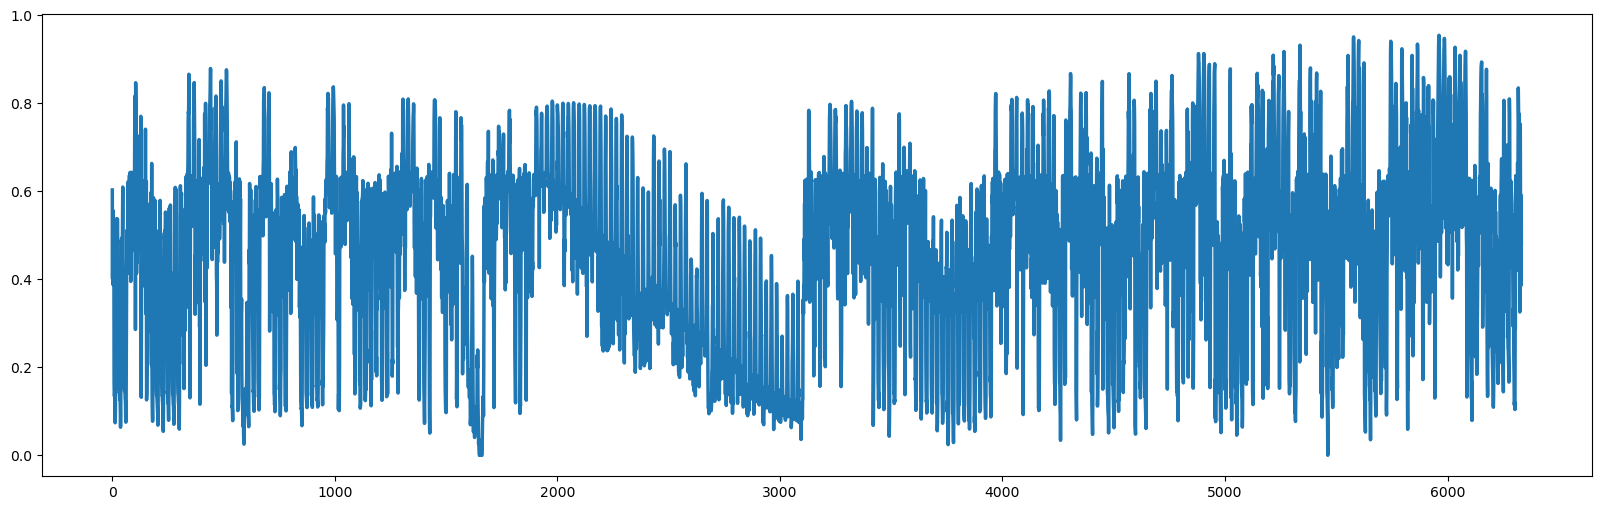

In [53]:
plt.plot(neb_.detach().numpy().flatten())

In [54]:
ghi_cs = df_neb['ghi_cs']

In [55]:
pred = GHI_cs.copy()
pred.columns = ['pred_']

In [56]:
pred

pred_
2022-09-10 04:00:00  0.000000
2022-09-10 05:00:00  0.000000
2022-09-10 06:00:00  0.000000
2022-09-10 07:00:00  0.000000
2022-09-10 08:00:00  0.056038
...                       ...
2023-05-31 20:00:00  0.095277
2023-05-31 21:00:00  0.000876
2023-05-31 22:00:00  0.000000
2023-05-31 23:00:00  0.000000
2023-06-01 00:00:00  0.000000

[6333 rows x 1 columns]

In [59]:
pred['pred_'] = ((1-a_val*np.power(neb_.detach().numpy().flatten(), n_val))* ghi_cs.to_numpy())*1000

In [60]:
true = GHI_m*1000

In [61]:
from sklearn.metrics import mean_squared_error as MSE
testScore = np.sqrt(MSE(true.values, pred.values))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/true.values.max())

Test Score: 77.97 RMSE
RMSE en % :  8.643866051743949


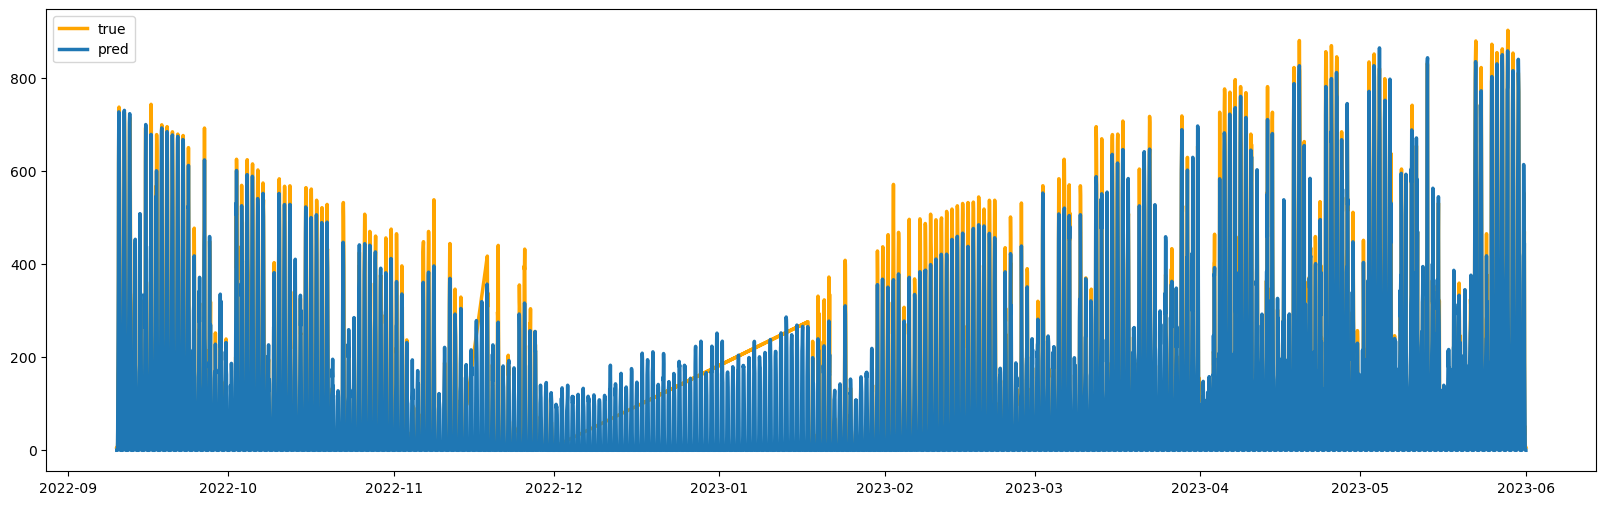

In [62]:
plt.plot(true, label = 'true', color = 'orange')
plt.plot(pred, label = 'pred')
plt.legend()
plt.show()


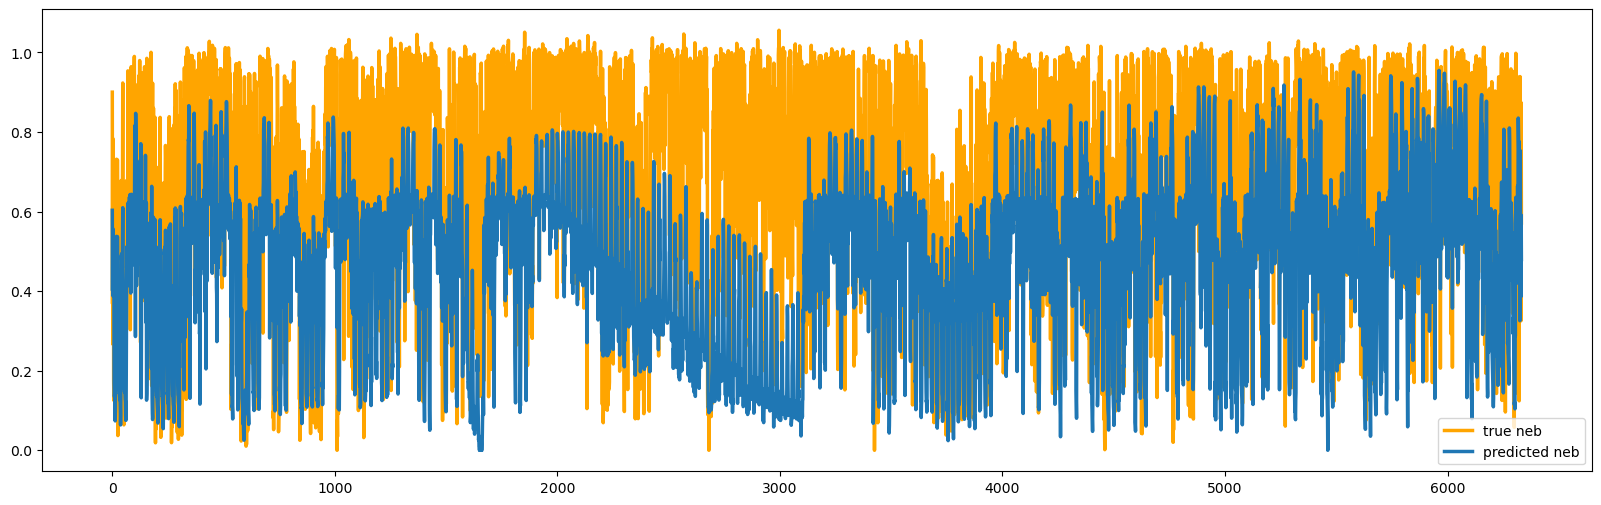

In [63]:
plt.plot(df[' nebulosity'].values, color = 'orange', label = 'true neb')
plt.plot(neb_.detach().numpy().flatten(), label = 'predicted neb')
plt.legend()

In [64]:
from sklearn.metrics import mean_squared_error as MSE
testScore = np.sqrt(MSE(df[' nebulosity'].values, neb_.detach().numpy().flatten()))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/df[' nebulosity'].values.max())

Test Score: 0.34 RMSE
RMSE en % :  32.03611029667892


## Remove missing data 

In [65]:
df_neb_feb = df_neb['2023-02-01':]
df_neb_feb

ghi_m    ghi_cs         a         n
2023-02-01 00:00:00  0.00600  0.000000  0.345836  0.474131
2023-02-01 01:00:00  0.00600  0.000000  0.430206  0.431958
2023-02-01 02:00:00  0.00600  0.000000  0.498184  0.397978
2023-02-01 03:00:00  0.00600  0.000000  0.517723  0.388212
2023-02-01 04:00:00  0.00600  0.000000  0.508069  0.393037
...                      ...       ...       ...       ...
2023-05-31 20:00:00  0.05070  0.095277  0.454109  0.374433
2023-05-31 21:00:00  0.01460  0.000876  0.392083  0.453318
2023-05-31 22:00:00  0.00712  0.000000  0.368177  0.463336
2023-05-31 23:00:00  0.00700  0.000000  0.522657  0.386078
2023-06-01 00:00:00  0.00602  0.000000  0.438547  0.427795

[2880 rows x 4 columns]

In [66]:
df_neb_feb_ = df_neb_feb.to_numpy()
df_neb_feb_ = torch.tensor(df_neb_feb_, dtype=torch.float32)
my_dataset_nebfeb_ = TensorDataset(df_neb_feb_) # create your datset
my_dataloader_nebfeb_ = DataLoader(my_dataset_nebfeb_, batch_size=24)

In [67]:
train = df_neb_feb[:]

In [68]:
X_train = torch.tensor(train.values, dtype=torch.float32)

In [ ]:
# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.hidden1 = nn.Linear(4, 24)
#         self.act1 = nn.ReLU()
#         self.hidden2 = nn.Linear(24, 24)
#         self.act2 = nn.ReLU()
#         self.output1 = nn.Linear(24, 1)
#         self.act_output1 = nn.ReLU()

 
#     def forward(self, x):
#         x = self.act1(self.hidden1(x))
#         x = self.act2(self.hidden2(x))
#         output1 = self.act_output1(self.output1(x))
#         return output1

In [69]:
class NeuralNetwork2(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(4, 24)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(24, 24)
        self.act2 = nn.ReLU()
        self.output1 = nn.Linear(24, 1)
        self.act_output1 = nn.ReLU()

 
    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        output1 = self.act_output1(self.output1(x))
        return output1

In [70]:
model2 = NeuralNetwork2()
print(model2)

NeuralNetwork2(
  (hidden1): Linear(in_features=4, out_features=24, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=24, out_features=24, bias=True)
  (act2): ReLU()
  (output1): Linear(in_features=24, out_features=1, bias=True)
  (act_output1): ReLU()
)


In [71]:
optimizer = optim.Adam(model2.parameters(), lr=0.0001)

In [72]:
n_epochs = 100
batch_size = 24
 
for epoch in range(n_epochs):
    for index in my_dataloader_nebfeb_:
        y_pred = model2(index[0])
        # calculating squared difference between target and predicted values 
        diff = torch.square(index[0][:,0] - (1- (index[0][:,2] * torch.pow(y_pred, index[0][:,3])))* index[0][:,1])
        loss = torch.sum(diff)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 2.1214964389801025
Finished epoch 1, latest loss 2.1068716049194336
Finished epoch 2, latest loss 2.09682559967041
Finished epoch 3, latest loss 2.089594841003418
Finished epoch 4, latest loss 2.0842745304107666
Finished epoch 5, latest loss 2.080324411392212
Finished epoch 6, latest loss 2.0774178504943848
Finished epoch 7, latest loss 2.0753705501556396
Finished epoch 8, latest loss 2.073991060256958
Finished epoch 9, latest loss 2.0730462074279785
Finished epoch 10, latest loss 2.07236385345459
Finished epoch 11, latest loss 2.0718164443969727
Finished epoch 12, latest loss 2.0713138580322266
Finished epoch 13, latest loss 2.0708324909210205
Finished epoch 14, latest loss 2.0703883171081543
Finished epoch 15, latest loss 2.0699539184570312
Finished epoch 16, latest loss 2.069547176361084
Finished epoch 17, latest loss 2.0691421031951904
Finished epoch 18, latest loss 2.068753957748413
Finished epoch 19, latest loss 2.0683705806732178
Finished epoch 20, 

Test on trained data

In [73]:
nebfeb_ = model2(X_train)

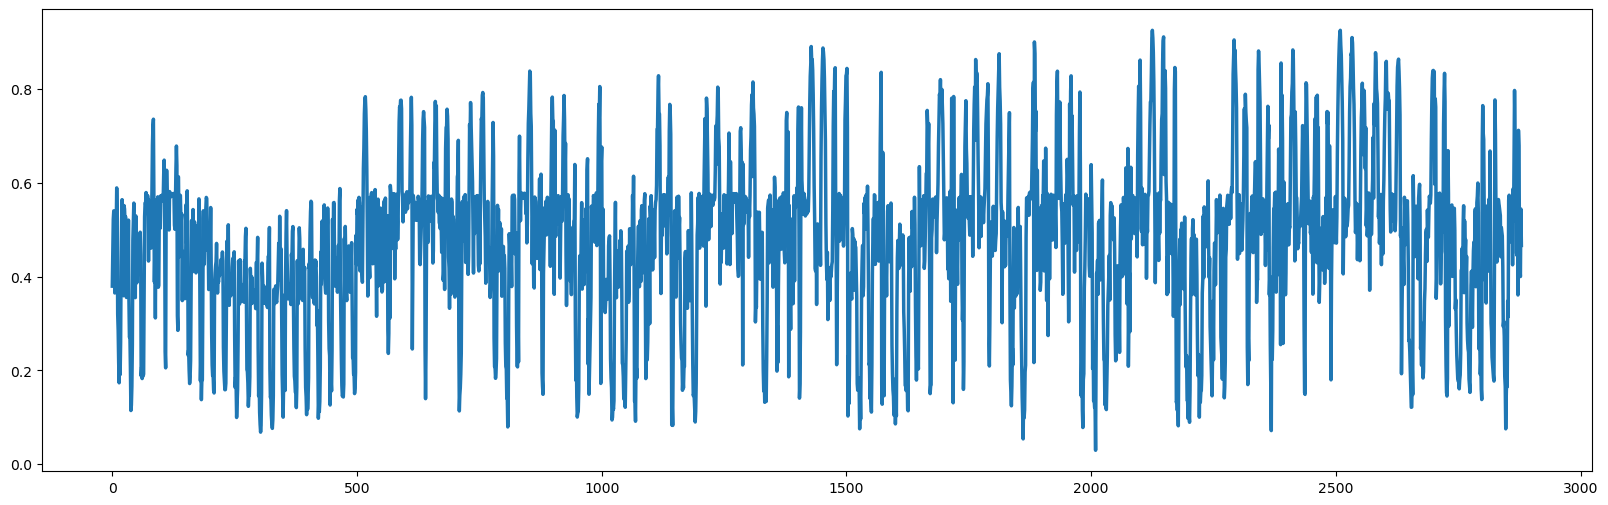

In [74]:
plt.plot(nebfeb_.detach().numpy().flatten())

In [75]:
ghi_cs = df_neb_feb['ghi_cs']

In [76]:
a = df_neb_feb['a']
n = df_neb_feb['n']

In [81]:
pred = GHI_cs.copy()['2023-02-01':]
pred.columns = ['pred_']

In [82]:
pred

pred_
2023-02-01 00:00:00  0.000000
2023-02-01 01:00:00  0.000000
2023-02-01 02:00:00  0.000000
2023-02-01 03:00:00  0.000000
2023-02-01 04:00:00  0.000000
...                       ...
2023-05-31 20:00:00  0.095277
2023-05-31 21:00:00  0.000876
2023-05-31 22:00:00  0.000000
2023-05-31 23:00:00  0.000000
2023-06-01 00:00:00  0.000000

[2880 rows x 1 columns]

In [83]:
pred['pred_'] = ((1-a.to_numpy()*np.power(nebfeb_.detach().numpy().flatten(), n.to_numpy()))* ghi_cs.to_numpy())*1000

In [84]:
true = GHI_m['2023-02-01':]*1000

In [85]:
from sklearn.metrics import mean_squared_error as MSE
testScore = np.sqrt(MSE(true.values, pred.values))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/true.values.max())

Test Score: 49.89 RMSE
RMSE en % :  5.530574004027421


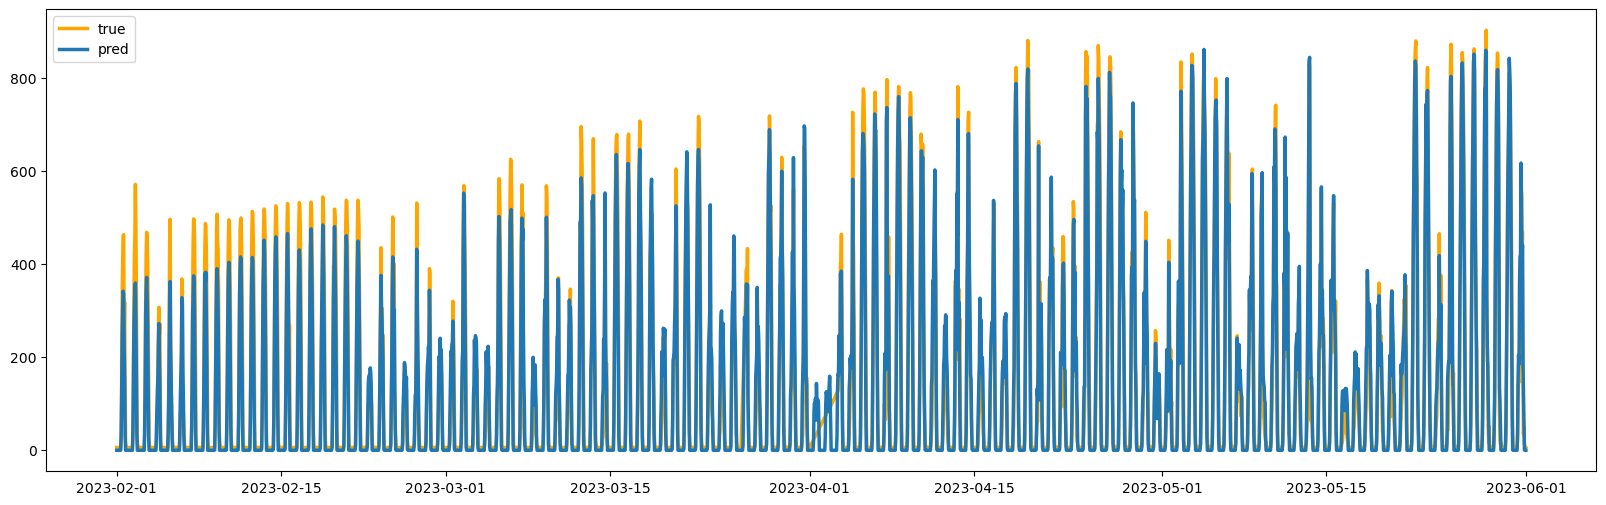

In [86]:
plt.plot(true, label = 'true', color = 'orange')
plt.plot(pred, label = 'pred')
plt.legend()
plt.show()


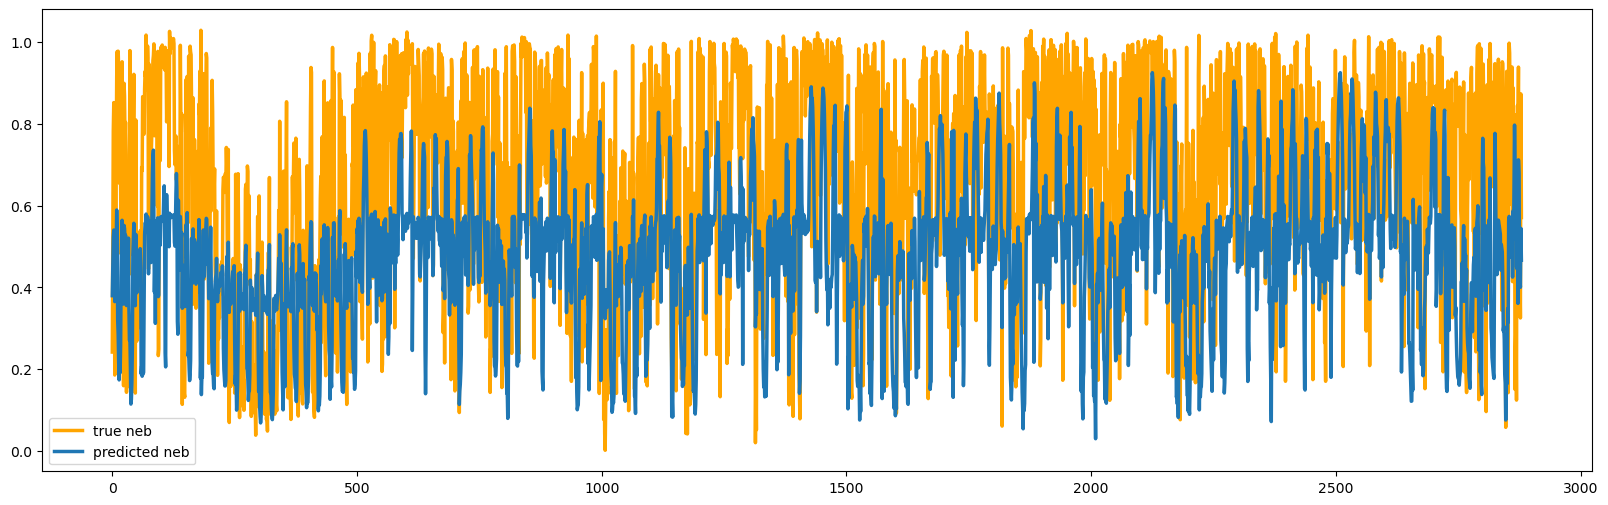

In [88]:
plt.plot(df[' nebulosity']['2023-02-01':].values, color = 'orange', label = 'true neb')
plt.plot(nebfeb_.detach().numpy().flatten(), label = 'predicted neb')
plt.legend()

Entrainement 1 mois

In [321]:
df_neb_sept = df_neb[:'2022-11-10']
df_neb_sept

ghi_m    ghi_cs         a         n
2022-09-10 04:00:00  0.00603  0.000000  0.531116  0.381527
2022-09-10 05:00:00  0.00697  0.000000  0.380432  0.457160
2022-09-10 06:00:00  0.00700  0.000000  0.497417  0.398694
2022-09-10 07:00:00  0.00700  0.000000  0.369995  0.462387
2022-09-10 08:00:00  0.01760  0.056038  0.370808  0.429957
...                      ...       ...       ...       ...
2022-11-10 19:00:00  0.00600  0.000000  0.338212  0.477941
2022-11-10 20:00:00  0.00600  0.000000  0.479876  0.407130
2022-11-10 21:00:00  0.00600  0.000000  0.429250  0.432435
2022-11-10 22:00:00  0.00600  0.000000  0.387796  0.453157
2022-11-10 23:00:00  0.00600  0.000000  0.298873  0.497605

[1485 rows x 4 columns]

In [322]:
df_neb_sept_ = df_neb_sept.to_numpy()
df_neb_sept_ = torch.tensor(df_neb_sept_, dtype=torch.float32)
my_dataset_nebsept_ = TensorDataset(df_neb_sept_) # create your datset
my_dataloader_nebsept_ = DataLoader(my_dataset_nebsept_, batch_size=24)

In [323]:
# train = df_neb_sept[:]
test = df_neb_feb[:]

In [324]:
# X_train = torch.tensor(train.values, dtype=torch.float32)
X_test = torch.tensor(test.values, dtype=torch.float32)

In [325]:
class NeuralNetwork2(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(4, 24)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(24, 24)
        self.act2 = nn.ReLU()
        self.output1 = nn.Linear(24, 1)
        self.act_output1 = nn.ReLU()

 
    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        output1 = self.act_output1(self.output1(x))
        return output1

In [326]:
model2 = NeuralNetwork2()
print(model2)

NeuralNetwork2(
  (hidden1): Linear(in_features=4, out_features=24, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=24, out_features=24, bias=True)
  (act2): ReLU()
  (output1): Linear(in_features=24, out_features=1, bias=True)
  (act_output1): ReLU()
)


In [327]:
optimizer = optim.Adam(model2.parameters(), lr=0.001)

In [328]:
n_epochs = 250
batch_size = 24
 
for epoch in range(n_epochs):
    for index in my_dataloader_nebsept_:
        y_pred = model2(index[0])
        # calculating squared difference between target and predicted values 
        diff = torch.square(index[0][:,0] - (1- (index[0][:,2] * torch.pow(y_pred, index[0][:,3])))* index[0][:,1])
        loss = torch.sum(diff)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 0.9435374736785889
Finished epoch 1, latest loss 0.8470431566238403
Finished epoch 2, latest loss 0.8494251370429993
Finished epoch 3, latest loss 0.8336193561553955
Finished epoch 4, latest loss 0.8172836303710938
Finished epoch 5, latest loss 0.8264241218566895
Finished epoch 6, latest loss 0.825283944606781
Finished epoch 7, latest loss 0.8290252685546875
Finished epoch 8, latest loss 0.7689369320869446
Finished epoch 9, latest loss 0.8094737529754639
Finished epoch 10, latest loss 0.8159195184707642
Finished epoch 11, latest loss 0.8201800584793091
Finished epoch 12, latest loss 0.8240880966186523
Finished epoch 13, latest loss 0.8272914290428162
Finished epoch 14, latest loss 0.828467845916748
Finished epoch 15, latest loss 0.8280079364776611
Finished epoch 16, latest loss 0.8267565965652466
Finished epoch 17, latest loss 0.8274785876274109
Finished epoch 18, latest loss 0.8265353441238403
Finished epoch 19, latest loss 0.8295019865036011
Finished epo

Test on trained data

In [329]:
nebsept_ = model2(X_test)

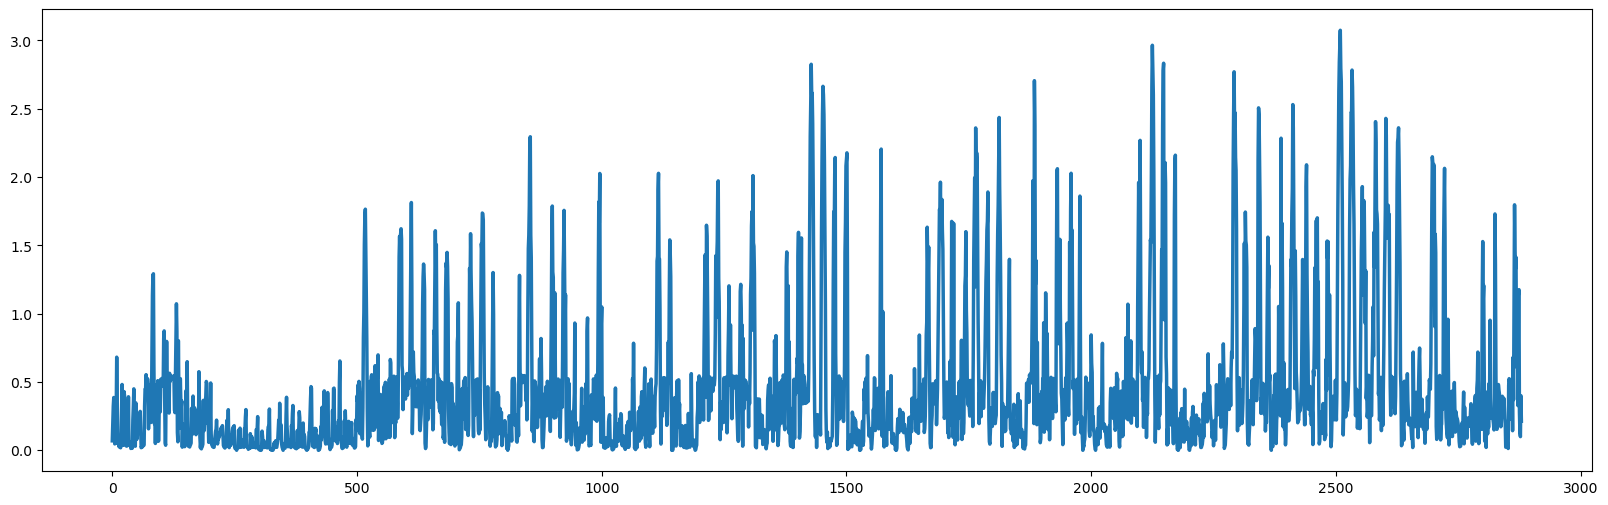

In [330]:
plt.plot(nebsept_.detach().numpy().flatten())

In [331]:
ghi_cs = df_neb_feb['ghi_cs']

In [332]:
a = df_neb_feb['a']
n = df_neb_feb['n']

In [333]:
pred = GHI_cs.copy()['2023-02-01':]
pred.columns = ['pred_']

In [334]:
pred

pred_
2023-02-01 00:00:00  0.000000
2023-02-01 01:00:00  0.000000
2023-02-01 02:00:00  0.000000
2023-02-01 03:00:00  0.000000
2023-02-01 04:00:00  0.000000
...                       ...
2023-05-31 20:00:00  0.095277
2023-05-31 21:00:00  0.000876
2023-05-31 22:00:00  0.000000
2023-05-31 23:00:00  0.000000
2023-06-01 00:00:00  0.000000

[2880 rows x 1 columns]

In [335]:
pred['pred_'] = ((1-a.to_numpy()*np.power(nebfeb_.detach().numpy().flatten(), n.to_numpy()))* ghi_cs.to_numpy())*1000

In [336]:
true = GHI_m['2023-02-01':]*1000

In [337]:
from sklearn.metrics import mean_squared_error as MSE
testScore = np.sqrt(MSE(true.values, pred.values))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/true.values.max())

Test Score: 49.89 RMSE
RMSE en % :  5.530574004027421


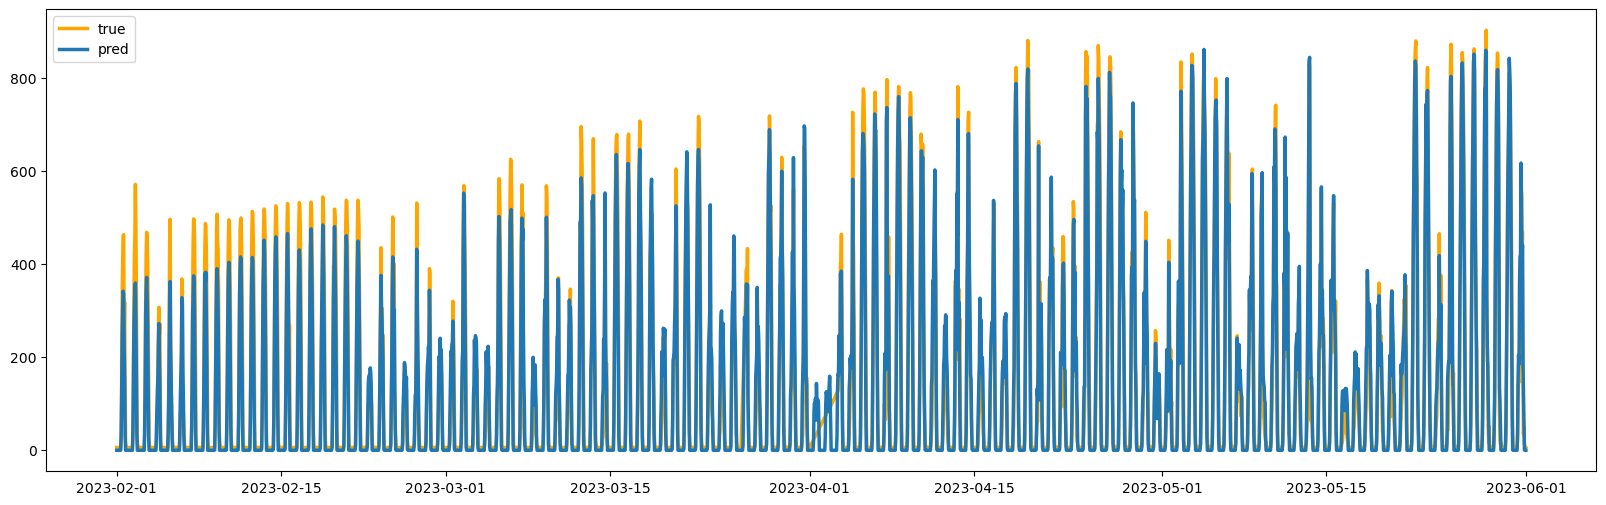

In [338]:
plt.plot(true, label = 'true', color = 'orange')
plt.plot(pred, label = 'pred')
plt.legend()
plt.show()


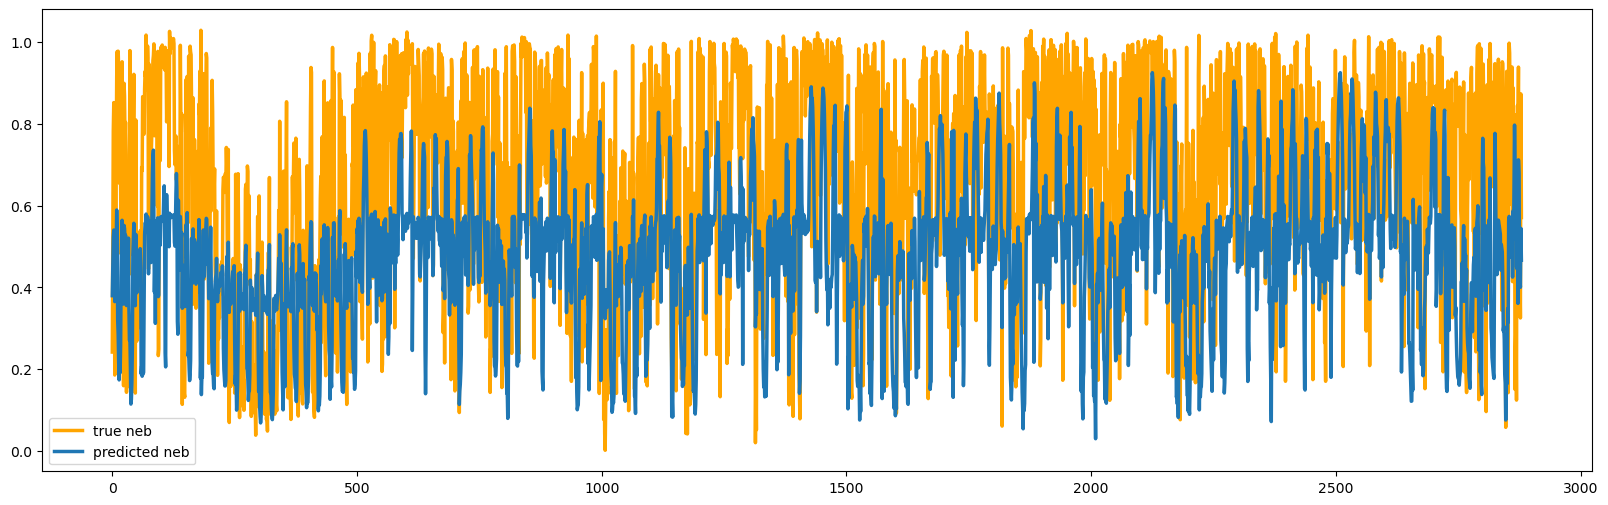

In [ ]:
plt.plot(df[' nebulosity']['2023-02-01':].values, color = 'orange', label = 'true neb')
plt.plot(nebfeb_.detach().numpy().flatten(), label = 'predicted neb')
plt.legend()

# Particules Swarm Optimization approach

## First try for a and n optimization

In [26]:
from pyswarm import pso

In [188]:
def loss_func(x):
    a = x[0]
    n = x[1]
    diff = np.square(df['ghi_m'] - (1- (a * np.power(df[' nebulosity'], n)))* df['ghi_cs'] )
    loss = np.sum(diff)
    return loss

lb = [-1, -1]
ub = [1, 1]

xopt, fopt = pso(loss_func, lb, ub)

Stopping search: Swarm best objective change less than 1e-08


In [189]:
xopt

array([0.45519356, 0.58894557])

In [190]:
fopt

89.08526263093518

In [191]:
a = xopt[0]
n = xopt[1]

In [193]:
pred = GHI_cs.copy()
pred.columns = ['pred_']

In [194]:
pred

pred_
2022-09-10 04:00:00  0.000000
2022-09-10 05:00:00  0.000000
2022-09-10 06:00:00  0.000000
2022-09-10 07:00:00  0.000000
2022-09-10 08:00:00  0.056038
...                       ...
2023-05-31 20:00:00  0.095277
2023-05-31 21:00:00  0.000876
2023-05-31 22:00:00  0.000000
2023-05-31 23:00:00  0.000000
2023-06-01 00:00:00  0.000000

[6333 rows x 1 columns]

In [195]:
pred['pred_'] = ((1-a*np.power(df[' nebulosity'].values, n))* df['ghi_cs'].to_numpy())*1000

In [198]:
true =GHI_m*1000

In [199]:
from sklearn.metrics import mean_squared_error as MSE
testScore = np.sqrt(MSE(true.values, pred.values))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/true.values.max())

Test Score: 118.60 RMSE
RMSE en % :  13.148967464908038


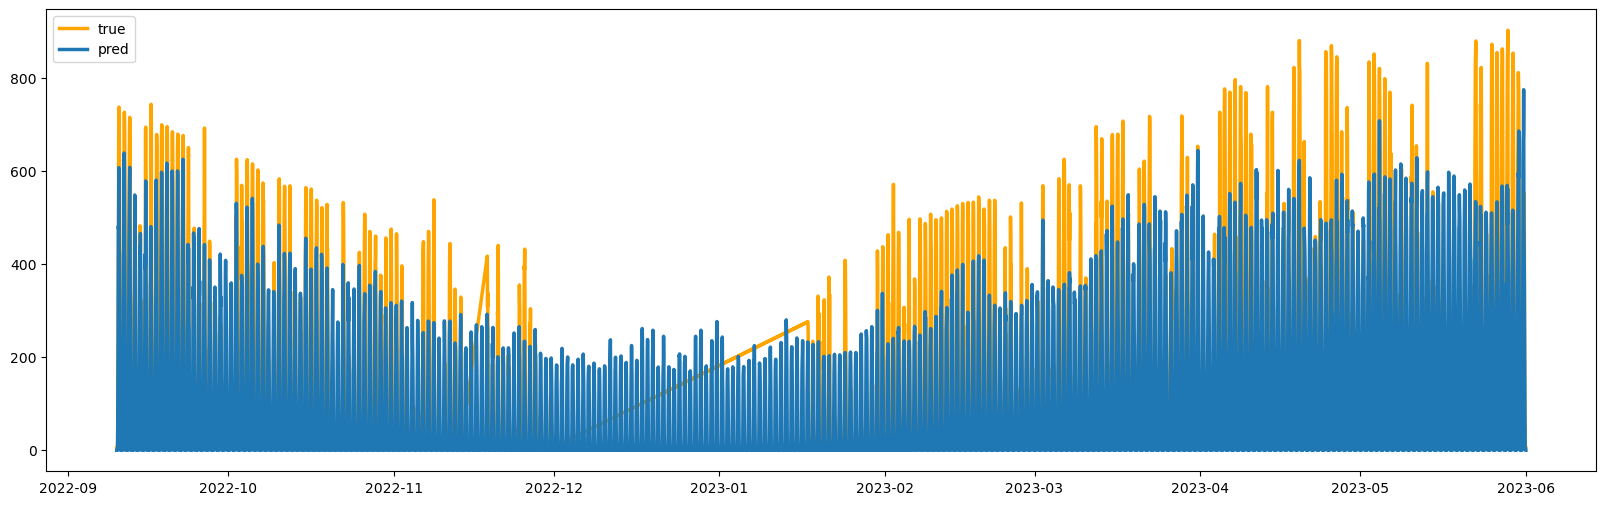

In [200]:
plt.plot(true, label = 'true', color = 'orange')
plt.plot(pred, label = 'pred')
plt.legend()
plt.show()


Here we only get one a and n but we would like to have one per hour less try again

## One per hour

In [178]:
def loss_func(x):
    a = x[0]
    n = x[1]
    diff = np.square(df['ghi_m'][index:index] - (1- (a * np.power(df[' nebulosity'][index:index], n)))* df['ghi_cs'][index:index])
    loss = np.sum(diff)
    return loss

lb = [-1, -1]
ub = [1, 1]
xa = []
xn = []
for index, row in df[:'2022-09-10'].iterrows():
    # print(df[index:index])
    xopt, fopt = pso(loss_func, lb, ub)
    xa.append(xopt[0])
    xn.append(xopt[1])

Stopping search: maximum iterations reached --> 100


KeyboardInterrupt: 

In [179]:
xa

[-0.9201491896417933]

In [180]:
len(xa)

1

In [181]:
len(xn)

1

In [182]:
fopt

0.0

In [183]:
a = xopt[0]
n = xopt[1]

In [184]:
pred = GHI_cs[:'2022-09-10'].copy()
pred.columns = ['pred_']

In [185]:
pred

pred_
2022-09-10 04:00:00  0.000000
2022-09-10 05:00:00  0.000000
2022-09-10 06:00:00  0.000000
2022-09-10 07:00:00  0.000000
2022-09-10 08:00:00  0.056038
2022-09-10 09:00:00  0.228406
2022-09-10 10:00:00  0.405246
2022-09-10 11:00:00  0.555382
2022-09-10 12:00:00  0.664162
2022-09-10 13:00:00  0.722665
2022-09-10 14:00:00  0.726355
2022-09-10 15:00:00  0.674934
2022-09-10 16:00:00  0.572339
2022-09-10 17:00:00  0.426856
2022-09-10 18:00:00  0.252157
2022-09-10 19:00:00  0.075451
2022-09-10 20:00:00  0.000000
2022-09-10 21:00:00  0.000000
2022-09-10 22:00:00  0.000000
2022-09-10 23:00:00  0.000000

In [186]:
pred['pred_'] = ((1-xa*np.power(df[' nebulosity'][:'2022-09-10'].values, xn))* df['ghi_cs'][:'2022-09-10'].to_numpy())*1000

In [187]:
true =GHI_m[:'2022-09-10']*1000

In [188]:
from sklearn.metrics import mean_squared_error as MSE
testScore = np.sqrt(MSE(true.values, pred.values))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/true.values.max())

Test Score: 244.18 RMSE
RMSE en % :  33.131398711985064


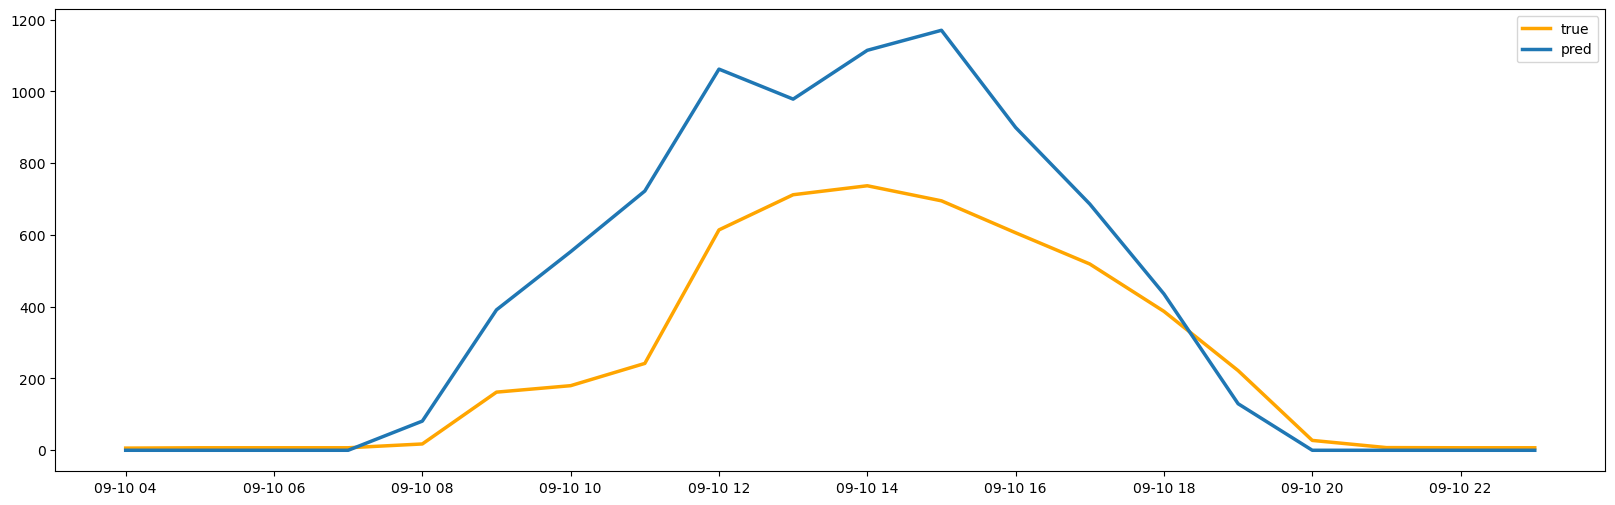

In [189]:
plt.plot(true, label = 'true', color = 'orange')
plt.plot(pred, label = 'pred')
plt.legend()
plt.show()


## More than 20 values


In [190]:
def loss_func(x):
    a = x[0]
    n = x[1]
    diff = np.square(df['ghi_m'][index:index] - (1- (a * np.power(df[' nebulosity'][index:index], n)))* df['ghi_cs'][index:index])
    loss = np.sum(diff)
    return loss

lb = [-1, -1]
ub = [1, 1]
xa = []
xn = []
for index, row in df[:'2022-10-01'].iterrows():
    # print(df[index:index])
    xopt, fopt = pso(loss_func, lb, ub)
    xa.append(xopt[0])
    xn.append(xopt[1])

KeyboardInterrupt: 

In [191]:
xa

[]

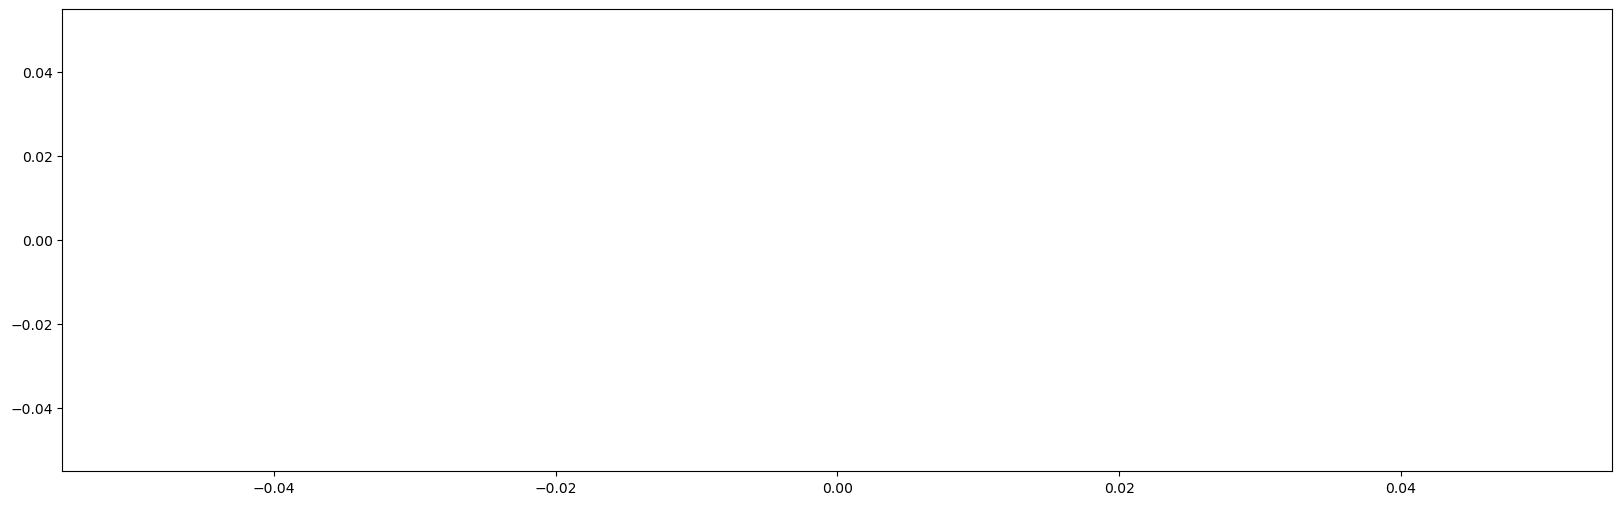

In [192]:
plt.plot(xa)

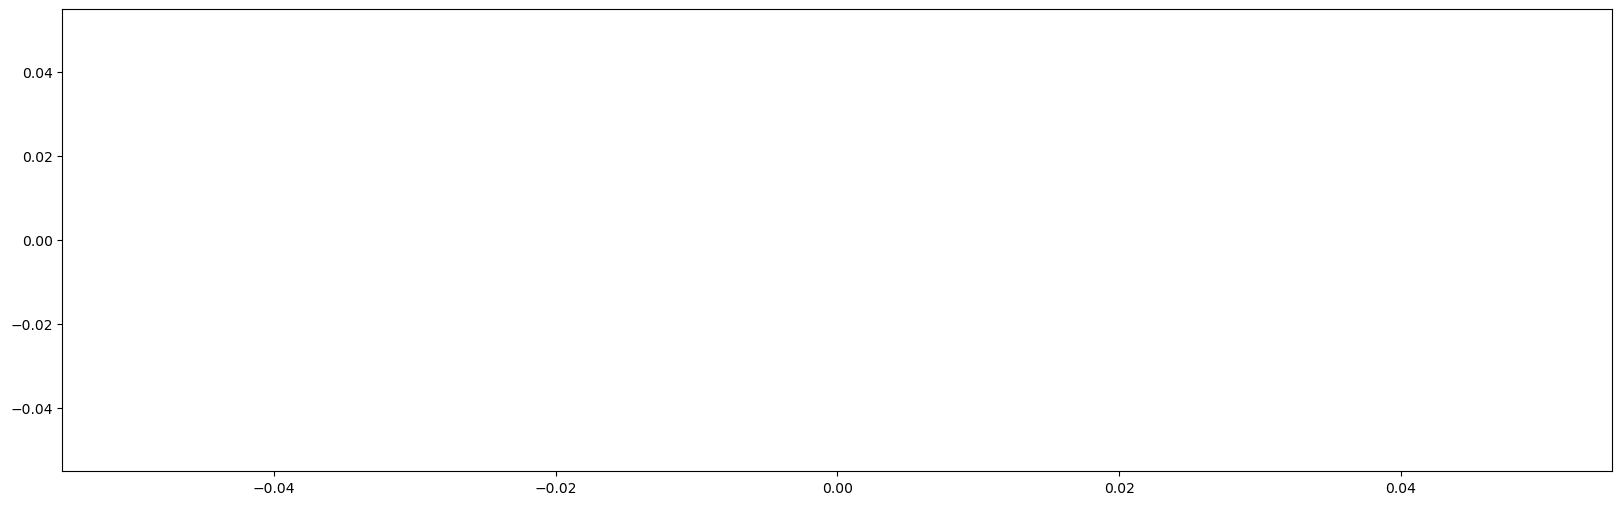

In [193]:
plt.plot(xn)

In [194]:
len(xa)

0

In [195]:
len(xn)

0

In [196]:
pred = GHI_cs[:'2022-10-01'].copy()
pred.columns = ['pred_']

In [197]:
pred

pred_
2022-09-10 04:00:00  0.000000
2022-09-10 05:00:00  0.000000
2022-09-10 06:00:00  0.000000
2022-09-10 07:00:00  0.000000
2022-09-10 08:00:00  0.056038
...                       ...
2022-10-01 19:00:00  0.003049
2022-10-01 20:00:00  0.000000
2022-10-01 21:00:00  0.000000
2022-10-01 22:00:00  0.000000
2022-10-01 23:00:00  0.000000

[524 rows x 1 columns]

In [198]:
pred['pred_'] = ((1-xa*np.power(df[' nebulosity'][:'2022-10-01'].values, xn))* df['ghi_cs'][:'2022-10-01'].to_numpy())*1000

ValueError: operands could not be broadcast together with shapes (524,) (0,) 

In [199]:
true =GHI_m[:'2022-10-01']*1000

In [200]:
from sklearn.metrics import mean_squared_error as MSE
testScore = np.sqrt(MSE(true.values, pred.values))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/true.values.max())

Test Score: 261.71 RMSE
RMSE en % :  35.223693985154775


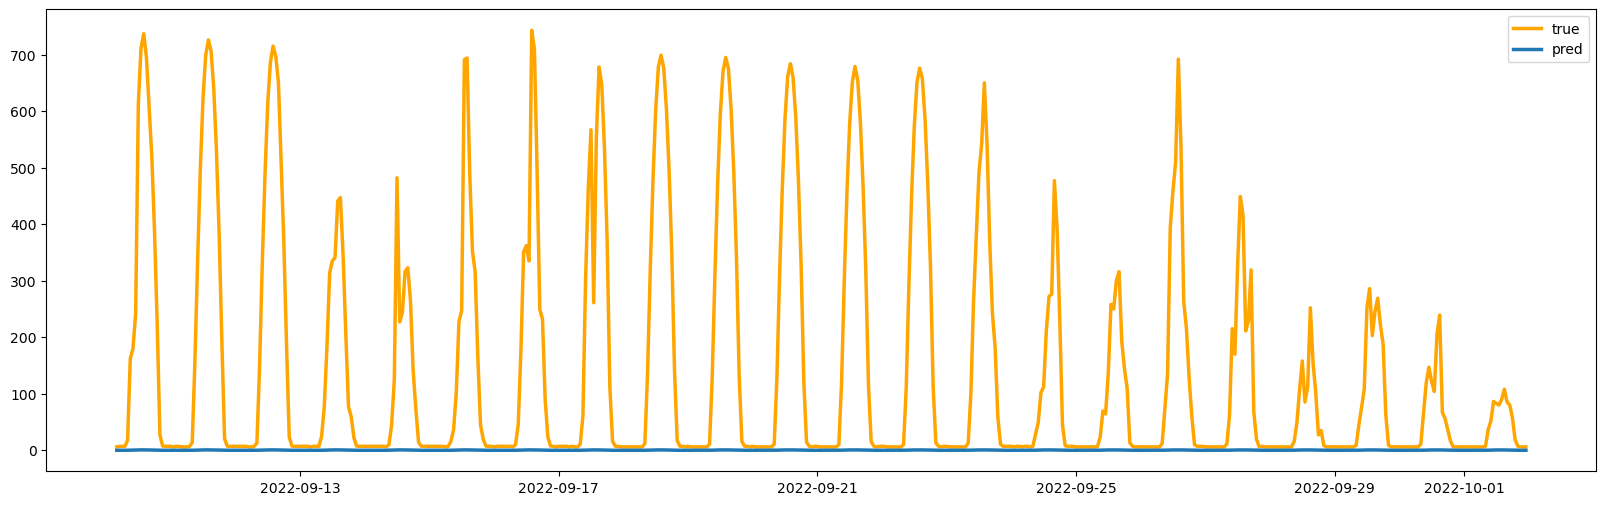

In [201]:
plt.plot(true, label = 'true', color = 'orange')
plt.plot(pred, label = 'pred')
plt.legend()
plt.show()


## Nebulosity with PSO

neb on 20 values 

In [248]:
def loss_func(x):
    neb = x[0]
    diff = np.square(df['ghi_m'][index:index] - (1- (a_val[i] * np.power(neb, n_val[i])))* df['ghi_cs'][index:index])
    loss = np.sum(diff)
    return loss

lb = [0]
ub = [1]
xneb = []
i = 0
for index, row in df[:'2022-09-10'].iterrows():
    # print(df[index:index])
    xopt, fopt = pso(loss_func, lb, ub)
    xneb.append(xopt[0])
    i +=1
 

Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --

In [249]:
xneb

[0.0910758752140709,
 0.17692452150000826,
 0.34065022249233934,
 0.4689788506595761,
 1.0,
 0.3561111042012584,
 1.0,
 1.0,
 0.19708083758028883,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.32473058479268413,
 0.019712229296668826,
 0.22254589014696224,
 0.583152753053457]

In [250]:
len(xneb)

20

In [251]:
pred = GHI_cs[:'2022-09-10'].copy()
pred.columns = ['pred_']

In [252]:
pred

pred_
2022-09-10 04:00:00  0.000000
2022-09-10 05:00:00  0.000000
2022-09-10 06:00:00  0.000000
2022-09-10 07:00:00  0.000000
2022-09-10 08:00:00  0.056038
2022-09-10 09:00:00  0.228406
2022-09-10 10:00:00  0.405246
2022-09-10 11:00:00  0.555382
2022-09-10 12:00:00  0.664162
2022-09-10 13:00:00  0.722665
2022-09-10 14:00:00  0.726355
2022-09-10 15:00:00  0.674934
2022-09-10 16:00:00  0.572339
2022-09-10 17:00:00  0.426856
2022-09-10 18:00:00  0.252157
2022-09-10 19:00:00  0.075451
2022-09-10 20:00:00  0.000000
2022-09-10 21:00:00  0.000000
2022-09-10 22:00:00  0.000000
2022-09-10 23:00:00  0.000000

In [253]:
pred['pred_'] = ((1-a_val[:i]*np.power(xneb, n_val[:i]))* df['ghi_cs'][:'2022-09-10'].to_numpy())*1000

In [254]:
true =GHI_m[:'2022-09-10']*1000

In [255]:
pred.isna().sum()

pred_    0
dtype: int64

In [256]:
from sklearn.metrics import mean_squared_error as MSE
testScore = np.sqrt(MSE(true.values, pred.values))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/true.values.max())

Test Score: 58.66 RMSE
RMSE en % :  7.959546185541544


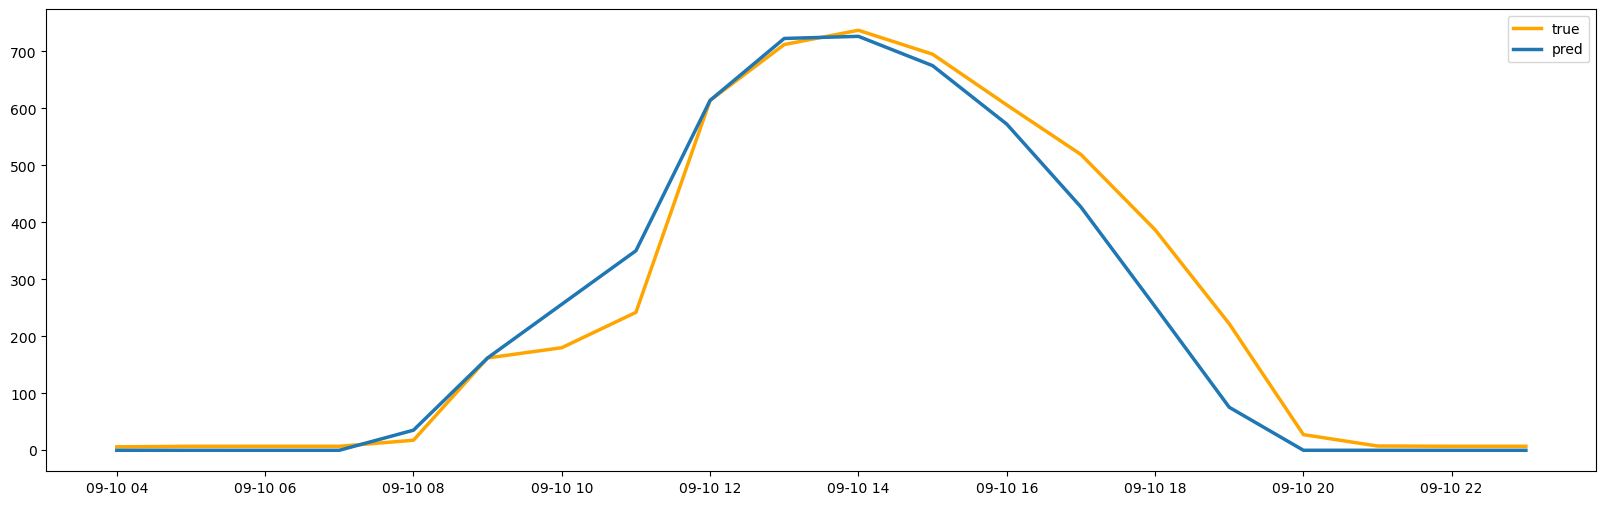

In [257]:
plt.plot(true, label = 'true', color = 'orange')
plt.plot(pred, label = 'pred')
plt.legend()
plt.show()


neb on 524 values

In [258]:
def loss_func(x):
    neb = x[0]
    diff = np.square(df['ghi_m'][index:index] - (1- (a_val[i] * np.power(neb, n_val[i])))* df['ghi_cs'][index:index])
    loss = np.sum(diff)
    return loss

lb = [0]
ub = [1]
xneb = []
i = 0
for index, row in df[:'2022-10-01'].iterrows():
    # print(df[index:index])
    xopt, fopt = pso(loss_func, lb, ub)
    xneb.append(xopt[0])
    i +=1
 

Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --

/var/folders/z0/_fm323qx69x9yssqwfc4gtlr0000gn/T/ipykernel_51656/4222659301.py:3: RuntimeWarning: divide by zero encountered in power
  diff = np.square(df['ghi_m'][index:index] - (1- (a_val[i] * np.power(neb, n_val[i])))* df['ghi_cs'][index:index])


Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum ite

In [259]:
xneb

[0.28765172765773717,
 0.5074636232719802,
 0.09826323281230154,
 0.041592639528780895,
 1.0,
 0.3556816246215688,
 1.0,
 1.0,
 0.19564023080065002,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5883906641955046,
 0.8502720484277314,
 0.9997448186525969,
 0.3821409607113565,
 0.18413136884905945,
 0.06500483456192885,
 0.787375876180907,
 0.06983638754405364,
 0.8011560847875512,
 0.0567905252616977,
 0.7644471690082877,
 0.9613915654779556,
 1.0,
 1.0,
 0.6211520545867983,
 0.7726594931016113,
 1.0,
 0.0,
 0.03318525345175529,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4356416302248596,
 0.7010838179135982,
 0.6121189103692305,
 0.5804897127928069,
 0.46238317764532266,
 0.9902949166674332,
 0.03588131984416232,
 0.42792786729467625,
 0.42777361925776236,
 0.2586818877736492,
 0.37079514939966496,
 0.6403132505709449,
 1.0,
 1.0,
 0.5954918746577736,
 0.8159689121126242,
 0.9569595528982433,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.06010804415748672,
 0.9793577277564515,
 0.17699841680922845

In [260]:
len(xneb)

524

In [76]:
pred = GHI_cs[:'2022-10-01'].copy()
pred.columns = ['pred_']

In [77]:
pred

pred_
2022-09-10 04:00:00  0.000000
2022-09-10 05:00:00  0.000000
2022-09-10 06:00:00  0.000000
2022-09-10 07:00:00  0.000000
2022-09-10 08:00:00  0.056038
...                       ...
2022-10-01 19:00:00  0.003049
2022-10-01 20:00:00  0.000000
2022-10-01 21:00:00  0.000000
2022-10-01 22:00:00  0.000000
2022-10-01 23:00:00  0.000000

[524 rows x 1 columns]

In [70]:
a_val = 0.51
n_val = 0.64
xneb = 0.67

In [71]:
pred['pred_'] = ((1-a_val[:i]*np.power(xneb, n_val[:i]))* df['ghi_cs'][:'2022-10-01'].to_numpy())*1000

In [72]:
true =GHI_m[:'2022-10-01']*1000

In [73]:
pred.isna().sum()

0

In [74]:
from sklearn.metrics import mean_squared_error as MSE
testScore = np.sqrt(MSE(true.values, pred.values))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/true.values.max())

ValueError: Found input variables with inconsistent numbers of samples: [524, 525]

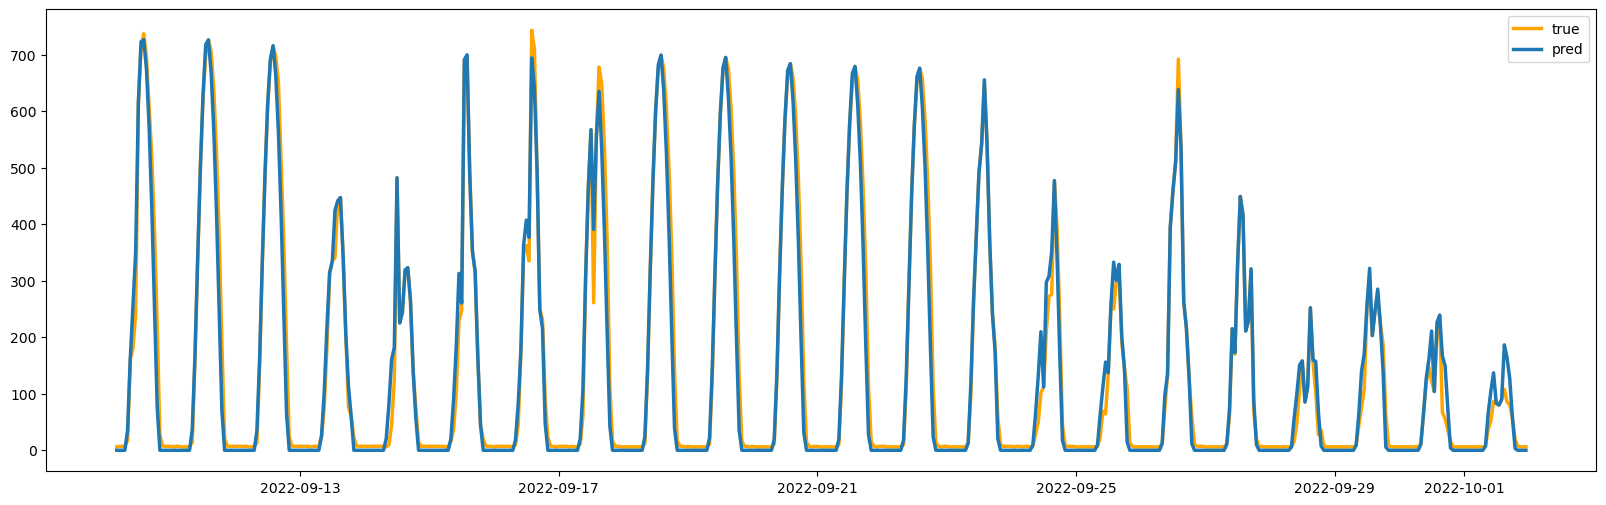

In [267]:
plt.plot(true, label = 'true', color = 'orange')
plt.plot(pred, label = 'pred')
plt.legend()
plt.show()


# 1 a and n per day

In [55]:
def loss_func(x):
    a = x[0]
    n = x[1]
    diff = np.square(df['ghi_m'][index:dates[i]] - (1- (a * np.power(df[' nebulosity'][index:dates[i]], n)))* df['ghi_cs'][index:dates[i]])
    loss = np.sum(diff)
    return loss

lb = [0, 0]
ub = [1, 10]
xa = []
xn = []
i = 1
end = '2022-10-11 04'[:9] + str(int('2022-10-11 04'[9])+1) + '2022-10-11 04'[10:]
print('end',end)
print(int('2022-10-11 04'[8]))

dates = pd.date_range("2022-09-11 04",end, freq="H")
for index, row in df[:'2022-10-10'].iterrows():
    # print(len(dates), len(df[:'2022-10-10']))
    # print(df[index:index])
    if (i-1) %24 == 0:
        print(index, dates[i])
        # xopt, fopt = pso(loss_func, lb, ub)
    
    # xa.append(xopt[0])
    # xn.append(xopt[1])
    i+=1

end 2022-10-12 04
1
2022-09-10 04:00:00 2022-09-11 05:00:00
2022-09-11 04:00:00 2022-09-12 05:00:00
2022-09-12 04:00:00 2022-09-13 05:00:00
2022-09-13 04:00:00 2022-09-14 05:00:00
2022-09-14 04:00:00 2022-09-15 05:00:00
2022-09-15 04:00:00 2022-09-16 05:00:00
2022-09-16 04:00:00 2022-09-17 05:00:00
2022-09-17 04:00:00 2022-09-18 05:00:00
2022-09-18 04:00:00 2022-09-19 05:00:00
2022-09-19 04:00:00 2022-09-20 05:00:00
2022-09-20 04:00:00 2022-09-21 05:00:00
2022-09-21 04:00:00 2022-09-22 05:00:00
2022-09-22 04:00:00 2022-09-23 05:00:00
2022-09-23 04:00:00 2022-09-24 05:00:00
2022-09-24 04:00:00 2022-09-25 05:00:00
2022-09-25 04:00:00 2022-09-26 05:00:00
2022-09-26 04:00:00 2022-09-27 05:00:00
2022-09-27 04:00:00 2022-09-28 05:00:00
2022-09-28 04:00:00 2022-09-29 05:00:00
2022-09-29 04:00:00 2022-09-30 05:00:00
2022-09-30 04:00:00 2022-10-01 05:00:00
2022-10-01 04:00:00 2022-10-02 05:00:00
2022-10-02 04:00:00 2022-10-03 05:00:00
2022-10-03 04:00:00 2022-10-04 05:00:00
2022-10-04 04:00:00 

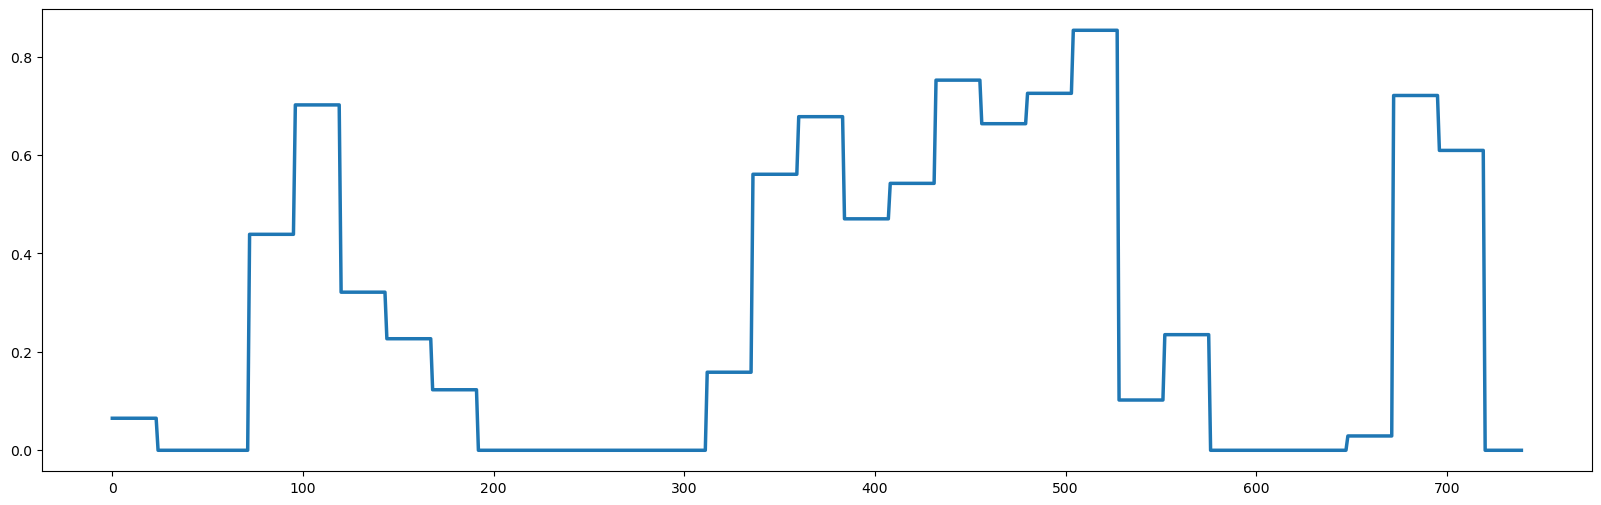

In [36]:
plt.plot(xa)

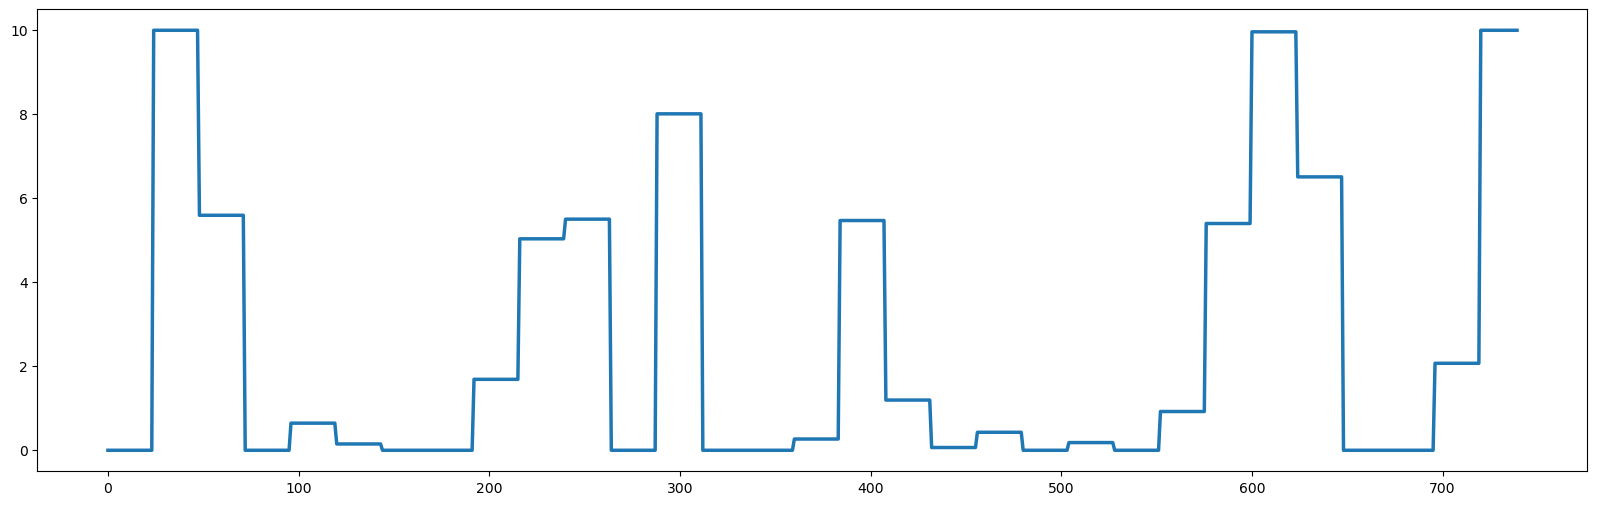

In [37]:
plt.plot(xn)

In [38]:
len(xa)

740

In [39]:
pred = GHI_cs[:'2022-10-10'].copy()
pred.columns = ['pred_']

In [40]:
pred

pred_
2022-09-10 04:00:00  0.000000
2022-09-10 05:00:00  0.000000
2022-09-10 06:00:00  0.000000
2022-09-10 07:00:00  0.000000
2022-09-10 08:00:00  0.056038
...                       ...
2022-10-10 19:00:00  0.000000
2022-10-10 20:00:00  0.000000
2022-10-10 21:00:00  0.000000
2022-10-10 22:00:00  0.000000
2022-10-10 23:00:00  0.000000

[740 rows x 1 columns]

In [41]:
pred['pred_'] = ((1-xa*np.power(df[' nebulosity'][:'2022-10-10'].values, xn))* df['ghi_cs'][:'2022-10-10'].to_numpy())*1000

In [42]:
true =GHI_m[:'2022-10-10']*1000

In [43]:
from sklearn.metrics import mean_squared_error as MSE
testScore = np.sqrt(MSE(true.values, pred.values))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/true.values.max())

Test Score: 66.98 RMSE
RMSE en % :  9.014205213593376


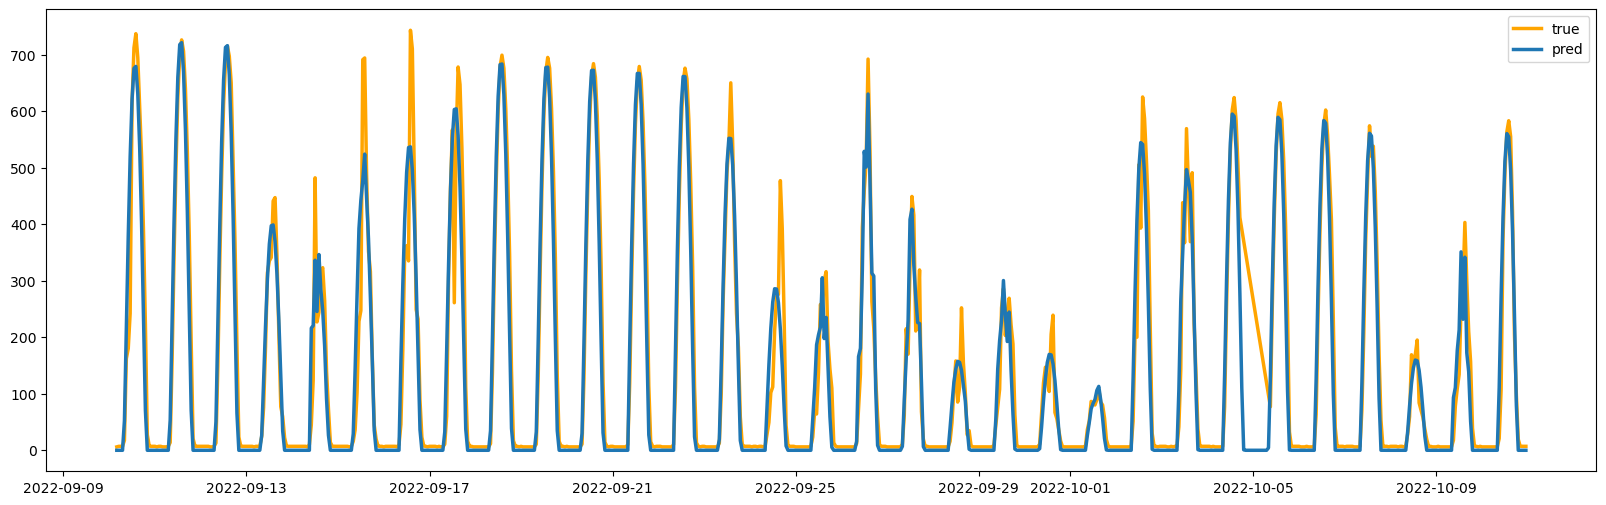

In [44]:
plt.plot(true, label = 'true', color = 'orange')
plt.plot(pred, label = 'pred')
plt.legend()
plt.show()


## def

In [45]:
def loss_func(x):
    a = x[0]
    n = x[1]
    diff = np.square(df['ghi_m'][index:dates[i]] - (1- (a * np.power(df[' nebulosity'][index:dates[i]], n)))* df['ghi_cs'][index:dates[i]])
    loss = np.sum(diff)
    return loss

def perday(start, end):
    lb = [0, 0]
    ub = [1, 10]
    xa = []
    xn = []
    i = 0
    
    for index, _ in df[start:end].iterrows():
        if i %24 == 0:
            print(index, dates[i])
            # xopt, _ = pso(loss_func, lb, ub)

        xa.append(xopt[0])
        xn.append(xopt[1])
        i+=1

    plt.plot(xa)
    plt.show()
    plt.plot(xn)
    plt.show()
    
    pred = GHI_cs[start:end].copy()
    pred.columns = ['pred_']

    pred['pred_'] = ((1-xa*np.power(df[' nebulosity'][start:end].values, xn))* df['ghi_cs'][start:end].to_numpy())*1000
    true =GHI_m[start:end]*1000

    from sklearn.metrics import mean_squared_error as MSE
    testScore = np.sqrt(MSE(true.values, pred.values))
    print('Test Score: %.2f RMSE' % (testScore))
    print('RMSE en % : ', testScore*100/true.values.max())
    plt.plot(true, label = 'true', color = 'orange')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.show()
    return xa, xn

    

In [153]:
lag = 3
end = '2022-10-05 04:00:00'
hour = (int(end[12])+lag)%24
day = int(end[9])+(lag//24)

if lag >= 24 :
    print(day)
    if day < 10:
        print('here')
        end = end[:9] + str(day) + end[10:]
    else : 
        end = end[:8] + str(day) + end[10:]
    lag %= 24

if lag < 24 :
    print(end[12], hour)
    if hour < 10:
        print('here')
        end = end[:12] + str(hour) + end[13:]
    else : 
        end = end[:11] + str(hour) + end[13:]
elif lag % 24 == 0 : 
    end = end[:9] + str((int(end[9])+1)%24) + end[10:]

4 7
here


In [154]:
end

'2022-10-05 07:00:00'

2023-02-01 00:00:00 2023-02-01 00:00:00
Stopping search: Swarm best objective change less than 1e-08
2023-02-02 00:00:00 2023-02-02 00:00:00
Stopping search: Swarm best objective change less than 1e-08
2023-02-03 00:00:00 2023-02-03 00:00:00
Stopping search: Swarm best objective change less than 1e-08
2023-02-04 00:00:00 2023-02-04 00:00:00
Stopping search: Swarm best objective change less than 1e-08
2023-02-05 00:00:00 2023-02-05 00:00:00
Stopping search: Swarm best objective change less than 1e-08
2023-02-06 00:00:00 2023-02-06 00:00:00
Stopping search: Swarm best objective change less than 1e-08
2023-02-07 00:00:00 2023-02-07 00:00:00
Stopping search: Swarm best objective change less than 1e-08
2023-02-08 00:00:00 2023-02-08 00:00:00
Stopping search: Swarm best objective change less than 1e-08
2023-02-09 00:00:00 2023-02-09 00:00:00
Stopping search: Swarm best objective change less than 1e-08
2023-02-10 00:00:00 2023-02-10 00:00:00
Stopping search: Swarm best objective change less t

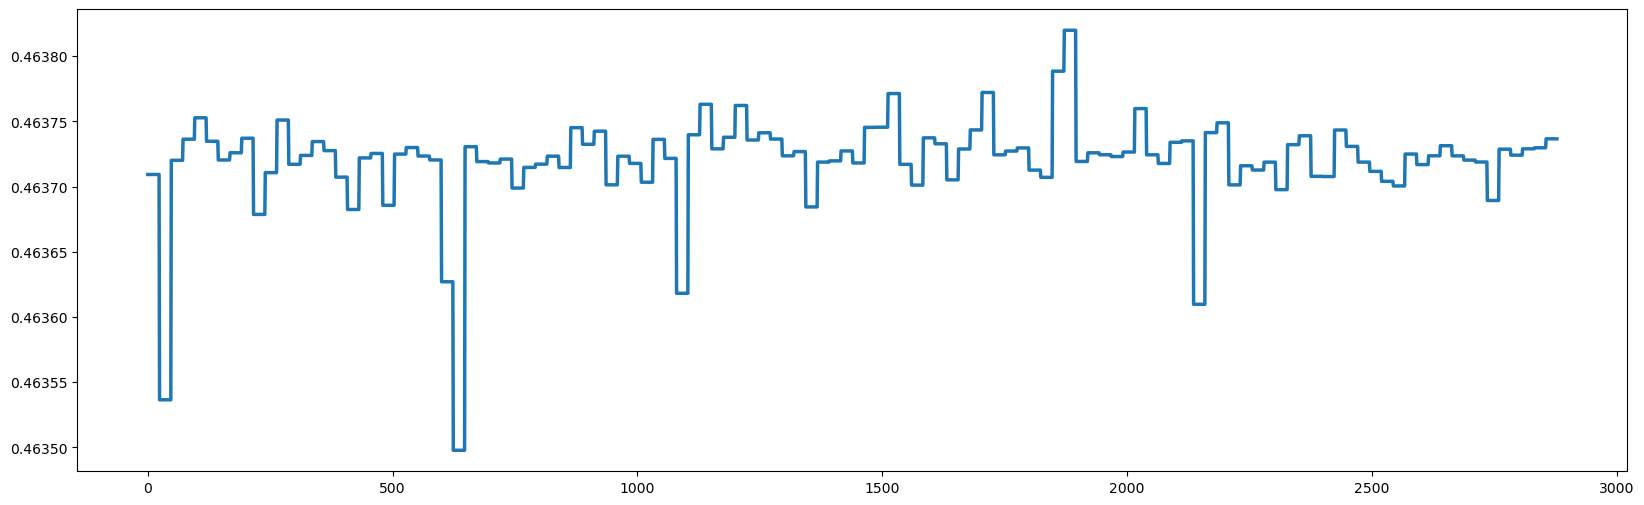

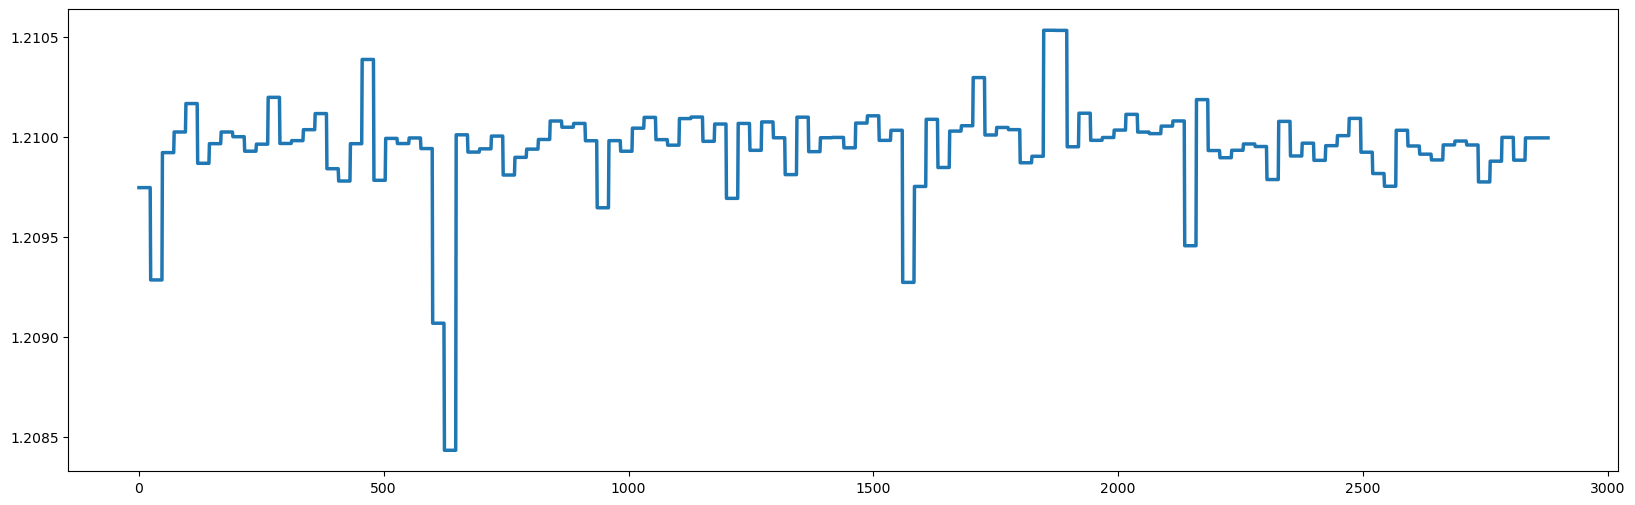

Test Score: 129.62 RMSE
RMSE en % :  14.37062775718863


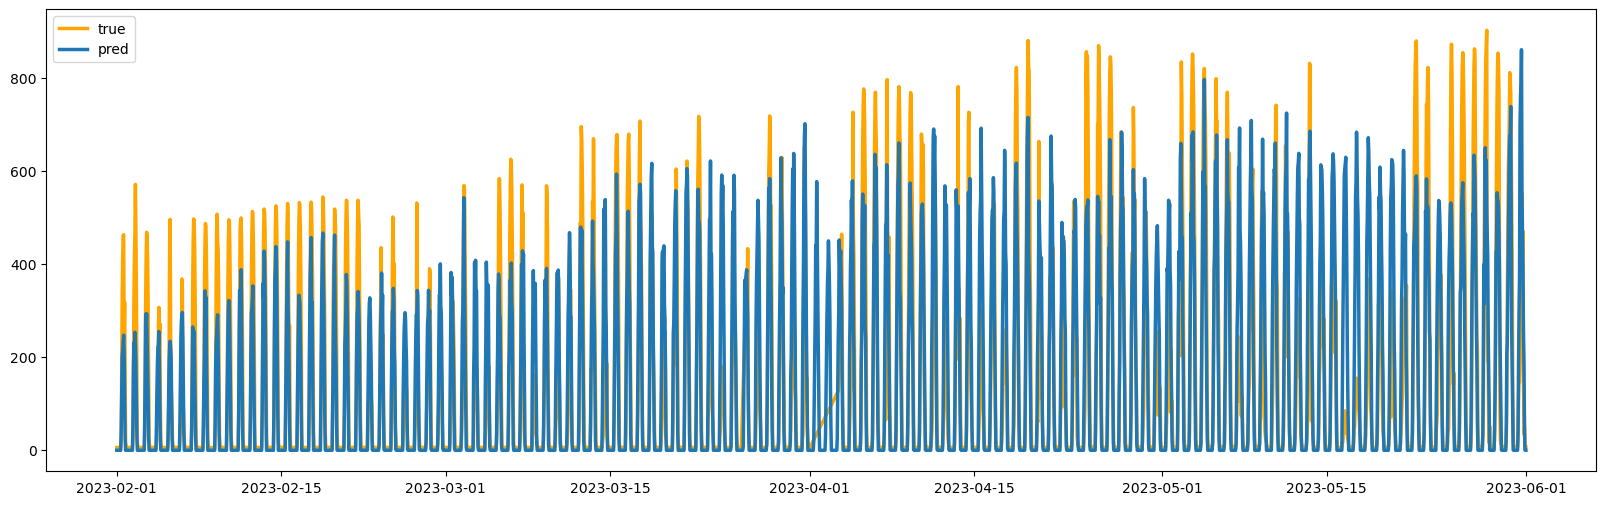

In [46]:
dates = pd.date_range("2023-02-01",'2023-06-01', freq="H")
xa_, xn_ = perday('2023-02-01', '2023-05-31')

In [448]:
df_neb = df['2023-02-01 7:00:00': '2023-05-31 7:00:00'].drop(' nebulosity', axis=1)
df_neb['a'] = xa_
df_neb['n'] = xn_

In [449]:
df_neb

ghi_m    ghi_cs         a         n
2023-02-01 07:00:00  0.0000  0.000000  0.467669  1.162634
2023-02-01 08:00:00  0.0000  0.000000  0.467669  1.162634
2023-02-01 09:00:00  0.0267  0.073564  0.467669  1.162634
2023-02-01 10:00:00  0.1690  0.208492  0.467669  1.162634
2023-02-01 11:00:00  0.3220  0.319819  0.467669  1.162634
...                     ...       ...       ...       ...
2023-05-31 03:00:00  0.0000  0.000000  0.467633  1.162517
2023-05-31 04:00:00  0.0000  0.000000  0.467633  1.162517
2023-05-31 05:00:00  0.0000  0.000000  0.467633  1.162517
2023-05-31 06:00:00  0.0000  0.000000  0.467633  1.162517
2023-05-31 07:00:00  0.0208  0.070599  0.467633  1.162517

[2856 rows x 4 columns]

In [450]:
df_neb_ = df_neb.to_numpy()
df_neb_ = torch.tensor(df_neb_, dtype=torch.float32)
my_dataset_neb = TensorDataset(df_neb_) # create your datset
my_dataloader_neb = DataLoader(my_dataset_neb, batch_size=24)

In [451]:
train = df_neb[:]

In [452]:
X_train = torch.tensor(train.values, dtype=torch.float32)

Test on trained data

In [453]:
neb_ = model2(X_train)

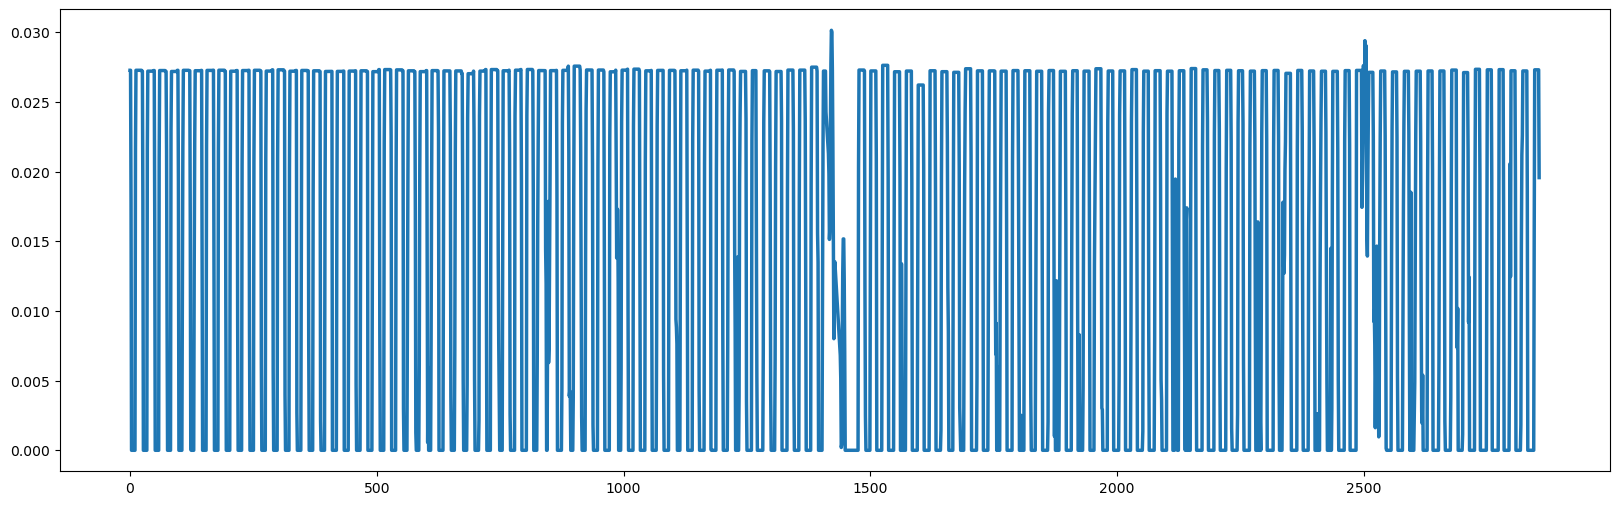

In [454]:
plt.plot(neb_.detach().numpy().flatten())

In [455]:
ghi_cs = df_neb['ghi_cs']

In [63]:
pred = GHI_cs['2023-02-01 7:00:00': '2023-05-31 7:00:00'].copy()
pred.columns = ['pred_']

In [57]:
pred

2023-02-01 07:00:00    0.000000
2023-02-01 08:00:00    0.000000
2023-02-01 09:00:00    0.073564
2023-02-01 10:00:00    0.208492
2023-02-01 11:00:00    0.319819
                         ...   
2023-05-31 03:00:00    0.000000
2023-05-31 04:00:00    0.000000
2023-05-31 05:00:00    0.000000
2023-05-31 06:00:00    0.000000
2023-05-31 07:00:00    0.070599
Name: ghi_cs, Length: 2856, dtype: float64

In [62]:
pred['pred_'] = ((1-xa_*np.power(neb_.detach().numpy().flatten(), xn_))* ghi_cs.to_numpy())*1000

AttributeError: 'float' object has no attribute 'detach'

In [459]:
true = GHI_m['2023-02-01 7:00:00': '2023-05-31 7:00:00']*1000

In [460]:
from sklearn.metrics import mean_squared_error as MSE
testScore = np.sqrt(MSE(true.values, pred.values))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/true.values.max())

Test Score: 180.41 RMSE
RMSE en % :  20.001543677637414


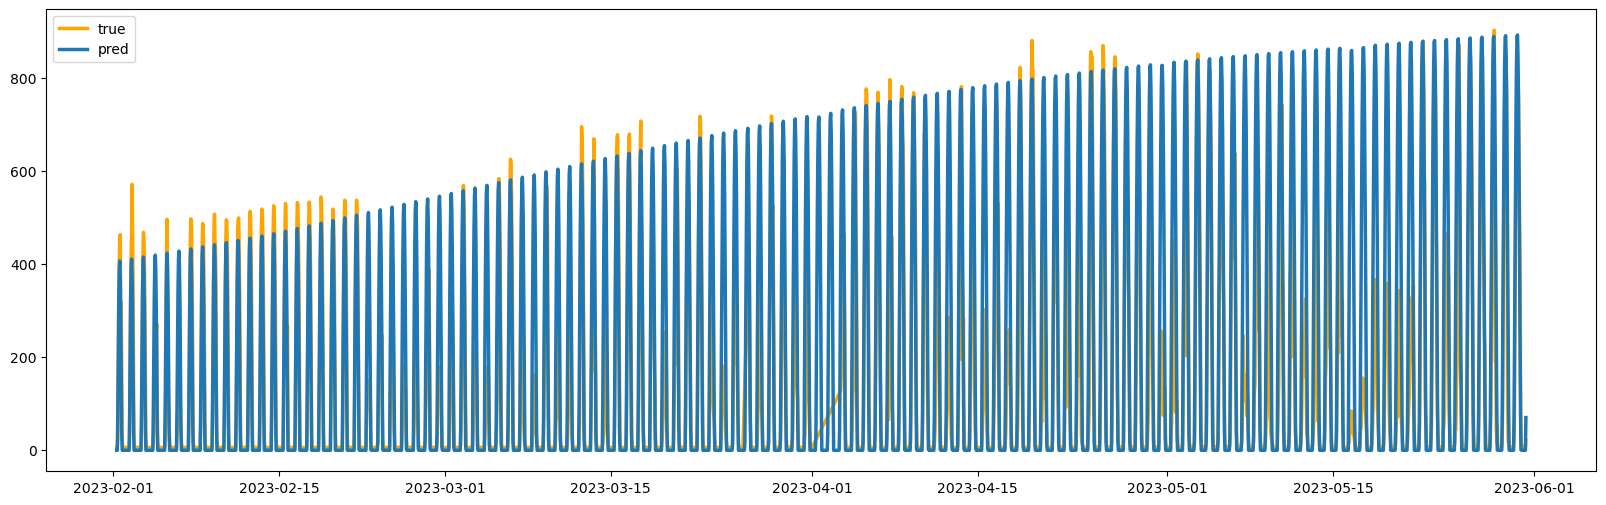

In [461]:
plt.plot(true, label = 'true', color = 'orange')
plt.plot(pred, label = 'pred')
plt.legend()
plt.show()
